# UCD Professional Academy - Certificate in Introductory Data Analytics - Craig Dowling

# Project Report: <i>Dwelling Sales in Ireland</i>

### Please [CLICK HERE](https://github.com/CraigDowling/UCDPA_craigdowling/blob/master/UCDPA_craigdowlingproject.ipynb) to view project on Git Hub.

## Abstract

##### <b>Title:</b> <i>Dwelling sales in Ireland</i>

##### <b>Background:</b> Dwelling sales in Ireland are becoming ever more expensive. For young people today, the prospect of becoming a homeowner is ever more difficult as a result. A report by the Central Statistics Office of Ireland in 2019 showed a rise in age of domestic property purchasers from 34 in 2010 to 38 in 2019. The aim of this research project was to research dwelling sales information in Ireland with a focus on Co. Dublin to enable young prospective homeowners to have a better understanding of the dwelling landscape in Ireland today.

##### <b>Method:</b> 
##### 1. Investigate dwelling sales information across different counties in Ireland in 2020.

##### 2. Investigate dwelling sales information in Dublin between 2010 and 2020.

##### 3. Investigate the inflation of dwelling prices in Dublin from 2010 - 2019 and its relationship with changes in rent costs and income per person.


##### <b>Results and Conclusion:</b> Dwelling price and number of sales were highest in Co. Dublin. Dwellings were cheapest in the midlands, north and north western counties. Within Dublin, dwelling price were highest in central and southern Dublin along the coatsline. Dwelling costs in Dublin have risen substantially in the past 10 years and the trend of this change had a very strong positive relationship with both rent costs and average income per person.



## Introduction

##### Dwelling sales in Ireland are becoming ever more expensive. For young people today, the prospect of becoming a homeowner is ever more difficult as a result. A report issued by the Central Statistics Office (CSO) in 2019 showed that the median age of dwelling purchasers stood at 38 years of age in 2019, up from 34 in 2019. The median age for joint purchasers was 36 and 38 for those without and with children respectively. The median age rose to 42  for sole purchasers, up from 34 in 2010 (CSO, 2019). Joint purchasers were responsible for 62.2% of the residential property market in 2019, up from 47% in 2010 highlighting the further difficulty faced by those purchasing property alone (CSO, 2019). 

##### The aim of this report project was to research dwelling sales information in Ireland with a closer focus on Dublin to enable young prospective homeowners to have a better understanding of the dwelling landscape today.

##### The objectives of this project were to:

##### 1. Investigate dwelling sales information across different counties in Ireland in 2020.

##### 2. Investigate dwelling sales information in Dublin between 2010 and 2020.

##### 3. Investigate the inflation of dwelling prices in Dublin from 2010 - 2019 and its relationship with changes in rent costs and income per person.

##### It was discovered that dwelling price and number of sales were highest in Co. Dublin, €530,981 and 14,723 respectively. Dwellings were cheapest on average in the midlands, north and north western counties, the cheapest being Roscommon at €120,738. Within Dublin, dwelling price was highest in central and southern Dublin along the coatsline. The most expensive District on average in Dublin was Dublin 4 at €658,279, and the most expensive area (town/street) on average was Dawson Street with 3 properties being sold at an average price of €1.7 million. 

##### Dwelling cost in Dublin has risen substantially in the past 10 years, from €333,028 in 2010 to €530,981 in 2020. It was also discovered that the rise in dwelling price had a very strong positive correlation with both rent costs and average income per person, <i>r</i> = 0.93 and <i>r</i> = 0.94 respectively.

### Importing Packages
##### Importing all required packages into shell which will be used throughout the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
import geopandas as gpd
import json
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.palettes import brewer

### Defining a Python function.
##### Throughout this project many csv files will be imported for further analysis/merging/concatenating. To increase the efficiency of the code the function below is defined which will read a csv file and return it as a Pandas DataFrame.

In [2]:
#Defining a function which will read a csv file and return it as a Pandas DataFrame.

def get_df_from_csv(csv_path):
    raw_path = f'{csv_path}'
    csv_data =  pd.read_csv(raw_path, encoding='unicode_escape')
    return pd.DataFrame(csv_data)

### Importing a real-world data set containing dwelling sales information in Ireland in 2020.

##### The below dataset which will be analysed throughout this section contains information on all of the *dwelling sales in Ireland in 2020. It contains information including but not limited to the date of sale, address of the dwelling, the postal code, the county, the price and whether the dwelling sale was a new property or a second hand property.

*Dwelling refers to either house or apartment. Dwellings may also be referenced as 'listings' when referring to the count of sales.

##### Limitations to this dataset include not differentiating the type of dwelling (house/apartment), the size of the dwelling, when the dwelling was built and other information such as energy ratings and attchment type (attached, semi-detatched, detatched) etc.

*[All CSV files used for analysing dwelling sales information in Ireland from 2010-2020 can be downloaded here.](https://data.smartdublin.ie/dataset/dublin-residential-property-price-register)(Smart Dublin, 2021)

In [3]:
#Using our defined function to import a file containing dwelling (house/apartment) sales in Ireland in 2020 and converting it to a pandas DataFrame.

house_2020 = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2020.csv')

#Printing the head of the Dataframe to have initial look at it's contents.
house_2020.head(2)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,02/01/2020,"109 Cedar Walk, Castleoaks, Dublin Road",NaN,Carlow,211410.0,No,Yes,New Dwelling house /Apartment,NaN
1,06/01/2020,"34 FR BYRNE PARK, GRAIGUECULLEN, CARLOW",NaN,Carlow,150000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


### Preparation and Analysis

##### Grouping the sales by the description of the property (second-hand vs new) and getting the count of the listings sold of each type of dwelling.

In [4]:
properties = house_2020.groupby("Description of Property")["Address"].count()
property_type = pd.DataFrame(properties)
property_type_sorted = property_type.sort_values("Address", ascending=False)
property_type_sorted

,Address
Description of Property,
Second-Hand Dwelling house /Apartment,39921
New Dwelling house /Apartment,9410
Teach/Árasán Cónaithe Atháimhe,2


### Preparation & Analysis
##### Creating a new DateFrame containing the number of listings sold in each county.

In [5]:
#Grouping by county and getting the count of the number of listings sold.
houses_per_county = house_2020.groupby("County")["Address"].count()

#Converting the series to a Pandas DataFrame.
df_houses_per_county = pd.DataFrame(houses_per_county)

#Sorting the DataFrame by the "Address" column (containing the number of listings sold) from most sold to least sold.
df_APC = df_houses_per_county.sort_values("Address", ascending=False)

#Resetting the index so that the "County" column is a column instead of the index within the DataFrame.
DF_APC = df_APC.reset_index()

#Renaming the column "Address" to "Listings Sold" so that the data makes more sense.
DF_APC.rename(columns = {'Address':'Listings Sold'}, inplace = True)

#Printing the DataFrame to observe changes and ensure they are correct.
DF_APC


,County,Listings Sold
0,Dublin,14723
1,Cork,5478
2,Kildare,2837
3,Galway,2361
4,Meath,2300
5,Limerick,1874
6,Wexford,1839
7,Wicklow,1734
8,Tipperary,1416
9,Waterford,1398


### Visualisation
##### Creating a Seaborn bar plot and matplotlip piechart to visualise the number of listings and percentage of dwellings sold in each county.

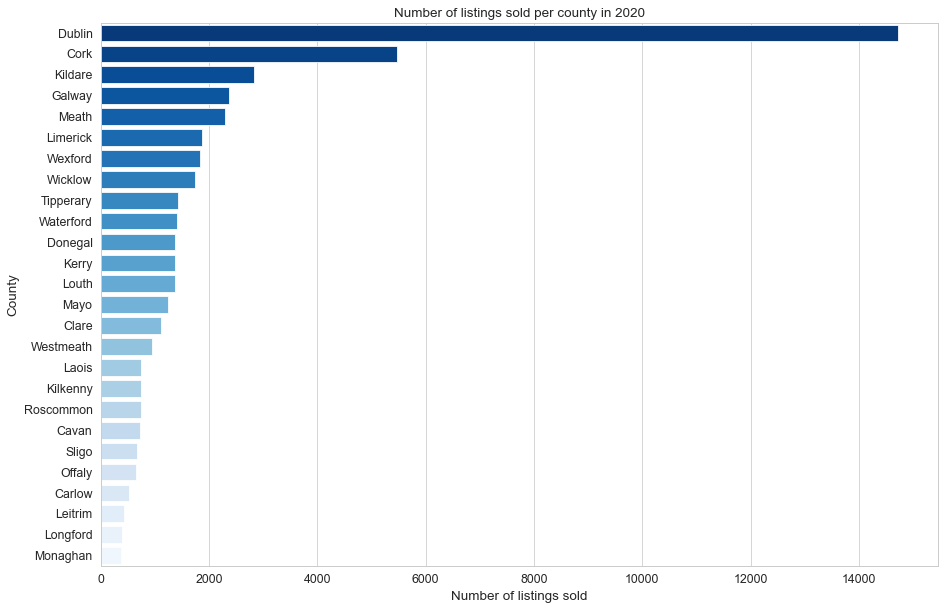

In [6]:
#Setting the seaborn figure size.
sns.set(rc={'figure.figsize':(15,10)})

#Setting the seaborn figure colour palette.
sns.color_palette("bright")

#Setting the seaborn figure style.
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.4)

#Creating a seaborn horizontal bar plot.
listing_sold_county_plot = sns.barplot(y="County", x="Listings Sold", data=DF_APC, palette="Blues_r", saturation=1, ci=90)

#Setting the title and xy axis titles.
listing_sold_county_plot.set(xlabel="Number of listings sold", ylabel="County", title="Number of listings sold per county in 2020")

#Printing the plot.
plt.show()

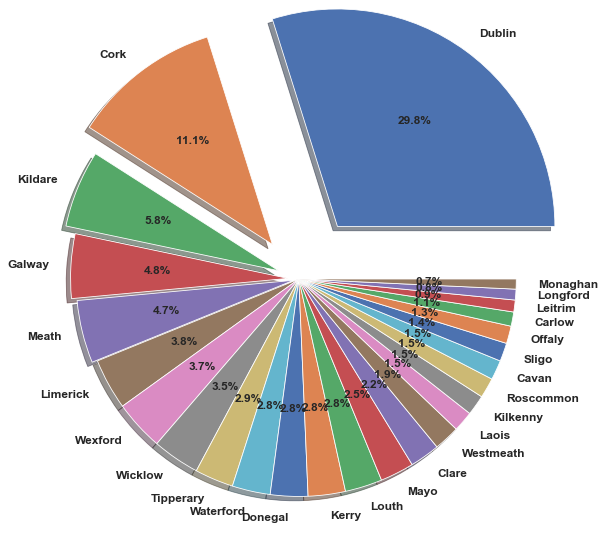

In [7]:
#Setting the size of the piechart.
plt.figure(figsize=(15, 10))

#Using 'explode' to exaggerate the counties with the most dwelling sales.
explode = (0.3, 0.2, 0.1, 0.05, 0.025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) 

#Plotting the piechart.
plt.pie(DF_APC["Listings Sold"], labels=DF_APC["County"], autopct="%.1f%%", explode=explode, shadow=True, textprops={'fontweight' : 'bold', 'fontsize' : 12})

#Printing the piechart
plt.show()

### Preparation & Analysis
##### A pivot table is created below consisting of the number of listings sold in each category (new/second-hand dwelling) in each county. Using the '.join()' function, the pivot chart and the dataframe, 'house_2020', containing information on the total listings sold in each county are joined. 

In [8]:
#Creating a pivot table on the DataFrame 'house_2020' to extract the number of each type of dwelling sold per county.
pt_house_type = pd.pivot_table(house_2020, index="County", columns=["Description of Property"], aggfunc='count')

#Joining the 'listing_sold_county' DataFrame and 'pt_house_type' Pivot Table on the 'County' column.
Listing_sold_county = DF_APC.join(pt_house_type["Address"], on="County")

#Subsetting the new DataFrame to the required columns.
Listing_sold_county = Listing_sold_county[['County', 'Listings Sold', 'New Dwelling house /Apartment', 'Second-Hand Dwelling house /Apartment']]

#Printing the new DataFrame.
Listing_sold_county

,County,Listings Sold,New Dwelling house /Apartment,Second-Hand Dwelling house /Apartment
0,Dublin,14723,3118.0,11605.0
1,Cork,5478,1196.0,4282.0
2,Kildare,2837,1110.0,1727.0
3,Galway,2361,404.0,1957.0
4,Meath,2300,842.0,1457.0
5,Limerick,1874,281.0,1593.0
6,Wexford,1839,316.0,1522.0
7,Wicklow,1734,473.0,1261.0
8,Tipperary,1416,107.0,1309.0
9,Waterford,1398,225.0,1173.0


### Preparation & Visualisation

##### Further preparation of the DataFrame is completed for visualisation of this data via a stacked bar chart below. The chart shows the number of each type of dwelling (new/second-hand) making up the total house sales in each county. 

##### A new DataFrame is created consisting of only the count of the dwelling types and the index is set to County.

In [9]:
#Creating a new DataFrame consisting of only "County" and the two dwelling types.
Listing_sold_county_condenced = Listing_sold_county[['County', 'Second-Hand Dwelling house /Apartment', 'New Dwelling house /Apartment']]

#Setting County as the index of the DataFrame.
Listing_sold_county_condenced = Listing_sold_county_condenced.set_index(Listing_sold_county_condenced['County'])

#Printing the head of the DataFrame.
Listing_sold_county_condenced.head(2)                                                                        

,County,Second-Hand Dwelling house /Apartment,New Dwelling house /Apartment
County,,,
Dublin,Dublin,11605.0,3118.0
Cork,Cork,4282.0,1196.0


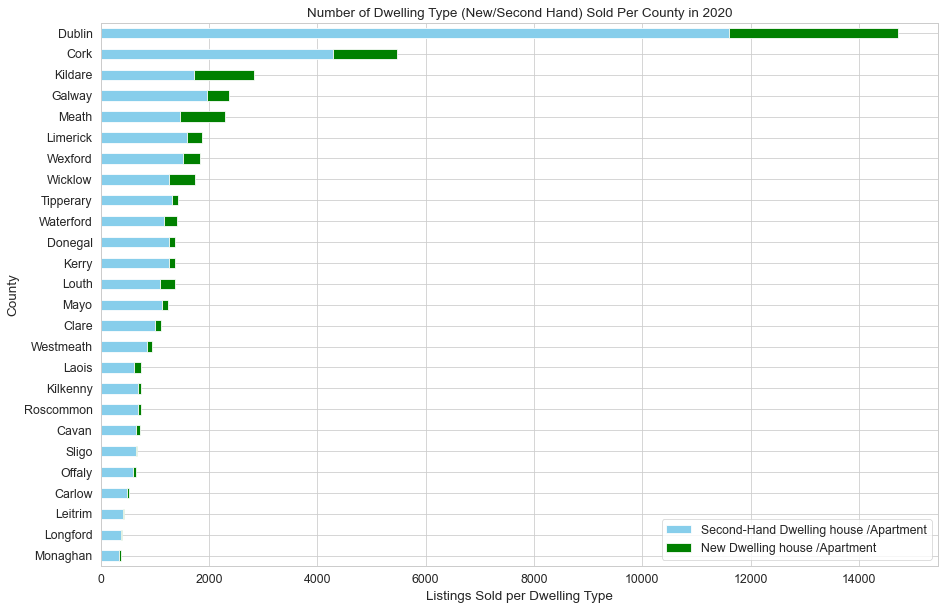

In [10]:
#Plotting the stacked barplot.
Listing_sold_county_condenced.set_index('County').plot(kind='barh', stacked=True, color=['skyblue','green']).invert_yaxis()

#Setting the plot title and axis titles
plt.title('Number of Dwelling Type (New/Second Hand) Sold Per County in 2020')
plt.xlabel('Listings Sold per Dwelling Type')
plt.ylabel('County')

#Printing the plot
plt.show()

### Preparation & Analysis
##### Creating a new DateFrame containing the average cost of dwellings sold in each county.

In [11]:
#Grouping by county and getting the mean price of dwellings.
average_price_per_county = house_2020.groupby("County")["Price"].mean()

#Converting to a Pandas DataFrame.
df_average_price_per_county = pd.DataFrame(average_price_per_county)

#Sorting the DataFrame by average dwelling cost from highest to lowest.
df_APPC = df_average_price_per_county.sort_values("Price", ascending=False)

#Resetting the index so that 'County' becomes a column within the DataFrame rather than the index.
DF_APPC = df_APPC.reset_index()

#Printing the DataFrame to observe changes and ensure they are correct.
DF_APPC

,County,Price
0,Dublin,530981.107399
1,Wicklow,364154.913737
2,Kildare,313545.808752
3,Meath,284653.512391
4,Cork,269574.221694
5,Galway,249784.036269
6,Kilkenny,220995.678277
7,Louth,220981.387430
8,Limerick,214184.053863
9,Carlow,208642.280787


### Visualisation
##### Creating a Seaborn bar plot to visualise the most expensive counties to live in, in Ireland.

<AxesSubplot:xlabel='Price', ylabel='County'>

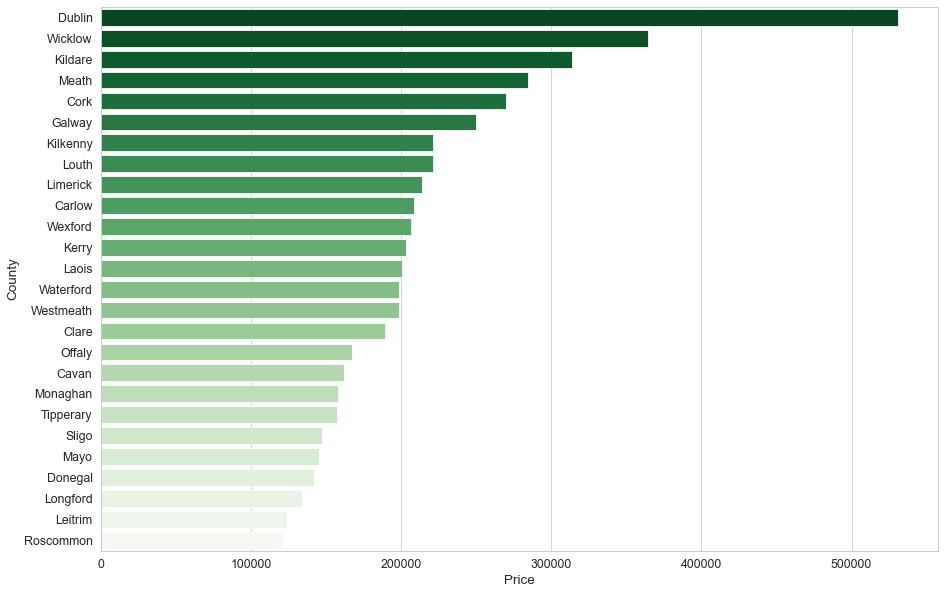

In [12]:
#Creating a seaborn horizontal bar plot.
sns.barplot(y="County", x="Price", data=DF_APPC, palette="Greens_r")

### Preparation
##### Here the DataFrames containing the number of dwellings sold per county (referred to as 'Listings Sold' in the new DataFrame) and average price of dwellings per county are merged into a new DataFrame for further visualisation.

In [13]:
listings_sold_county = DF_APC.merge(DF_APPC, on="County")
listings_sold_county.head(2)

,County,Listings Sold,Price
0,Dublin,14723,530981.107399
1,Cork,5478,269574.221694


### Visualisation
#### The code below is written to create an interactive map of Ireland which the user can hover over to view the average cost of dwellings and number of listings sold in each county in Ireland in 2020.

*[Shape file of Ireland imported from here.](https://data-osi.opendata.arcgis.com/datasets/OSi::counties-osi-national-statutory-boundaries-generalised-20m/explore?location=53.435032%2C-8.258351%2C6.99&showTable=true)(Ordnance Survey Ireland, 2019)

*[Steps to create interactive chart can be found within this youtube video.](https://www.youtube.com/watch?v=Wgd0Wm6SQIo) (Vinicius, M., 2019)

In [14]:
#Importing geopandas shape file.
irl_shape = gpd.read_file(r"C:\Users\Craig Dowling\Downloads\Administrative_Areas_-_OSi_National_Statutory_Boundaries_-shp.zip!0b3cbe50-ea67-467b-adb6-f3d9d3aaa43a2020329-1-f7bsff.bn1f.shp")

#Ensuring the data type is a GeoDataFrame.
type(irl_shape)

geopandas.geodataframe.GeoDataFrame

In [15]:
#Renaming "COUNTY" column in irl_shape geodataframe as "County" to enable merge with "listings_sold_county" on "County" column.
irl_shape_c = irl_shape.rename(columns={'COUNTY':'County'})

#Converting contents of "County" column to lower case before capitalising first letter of string to enable merge with "listings_sold_county" on "County" column.
irl_shape_c['County'] = irl_shape_c['County'].apply(str.lower)
irl_shape_c['County'] = irl_shape_c['County'].str.capitalize()

#Merging 'irl_shape' and 'listings_sold_county' via irl_shape to maintain geodataframe rather than normal pandas dataframe.
geo_df = irl_shape_c.merge(listings_sold_county, how='right')

#Converting 'Listings Sold' column contents from int to float type.
geo_df['Listings Sold'] = geo_df['Listings Sold'].astype(str)

#Creating a new dataframe, "geo_df_clean", containing only the "County", "Listings Sold" and "geometry" columns.
geo_df_clean = geo_df[["County", "Listings Sold", "Price", "geometry"]]

#Printing head of "geo_df_clean"
geo_df_clean.head(30)

,County,Listings Sold,Price,geometry
0,Dublin,14723,530981.107399,"POLYGON ((707726.777 732711.516, 707724.504 73..."
1,Dublin,14723,530981.107399,"POLYGON ((707653.397 732814.278, 707658.038 73..."
2,Dublin,14723,530981.107399,"MULTIPOLYGON (((710708.171 749673.974, 710710...."
3,Dublin,14723,530981.107399,"MULTIPOLYGON (((726225.981 725442.900, 726220...."
4,Cork,5478,269574.221694,"POLYGON ((573551.982 572645.593, 573559.366 57..."
5,Cork,5478,269574.221694,"MULTIPOLYGON (((539837.098 620406.502, 539820...."
6,Kildare,2837,313545.808752,"POLYGON ((700193.727 734740.683, 700202.676 73..."
7,Galway,2361,249784.036269,"MULTIPOLYGON (((524215.101 724655.829, 524214...."
8,Galway,2361,249784.036269,"MULTIPOLYGON (((587504.394 731786.650, 587505...."
9,Meath,2300,284653.512391,"POLYGON ((667284.641 761210.428, 667284.673 76..."


In [16]:
#Converting geo_df_clean (geopandas dataframe) to json file type("irl_shape_json")
irl_shape_json = json.loads(geo_df_clean.to_json())
type(irl_shape_json)

dict

In [17]:
#Converting "irl_shape_json" from dictionary type to string type so that it can be read by the GeoJSONDataSource package.
json_data = json.dumps(irl_shape_json)
type(json_data)

str

In [18]:
#Using GeoJSONDataSource to create the interactive map data source.
geo_source = GeoJSONDataSource(geojson = json_data)

#Choosing the colour palette from the Bokeh website.
palette=brewer["Greens"][6]

#Inverting the colour palette so that the darkest colours are the counties with the most expensive dwellings.
palette=palette[::-1]

#Setting the colour mapper to the palette and setting the high and low ranges according to roughly the least and most expensive average dwelling costs per county.
color_mapper = LinearColorMapper(palette=palette, low=120000, high=550000)

#Inserting a colour mapper.
color_bar = ColorBar(color_mapper=color_mapper)

#Inserting a hover tool which will show the name of the county, average dwelling price and number of listings sold in each county.
hover = HoverTool(tooltips = [('County', '@County'), ('Average Dwelling Price', '@Price'), ('No. of Listings Sold in 2020', "@{Listings Sold}")])

#Inserting the figure head and mapping tool to enable interaction with chart.
ghg_map = figure(title = "Average Dwelling Prices in Ireland by County", tools=[hover])

#Mapping the colour bar to the right of the interactive chart.
ghg_map.add_layout(color_bar, 'right')

#Defining the content of the chart (data source, filed which will define colour, line colour showing county borders).
ghg_map.patches(source = geo_source, fill_color={'field':'Price', 'transform':color_mapper}, line_color='black')

#Removing the axis as it did not add value.
ghg_map.axis.visible = False

In [19]:
#Running this will open the interactive chart in a new window.
show(ghg_map)

### Insight
##### The interactive map is a clear visualisation that the further away from major cities (Dublin, Cork, Galway), the cheaper dwelling prices become. It is well known that there is a greater desire to live closer to major cities due to obvious reasons such as employment opportunities as well as having access to services such as education, health, public transport etc. This results in increased dwelling cost due to the high demand to live in those cities. 


### Analysis
##### Below, further analysis is carried out on dwelling prices in counties across Ireland. 

##### Using the '.groupby()' and '.agg()' functions, the mean, min and max dwelling prices are calculated for both new and second-hand dwellings in counties across Ireland.

In [20]:
#Grouping the DataFrame by County and type of dwelling and calculating the mean, min and max prices.
house_types_2020 = house_2020.groupby(["County", "Description of Property"]).agg({'Price':['mean', 'min', 'max']})

#Printing the Dataframe.
house_types_2020

Price             \
                                                          mean        min   
County    Description of Property                                           
Carlow    New Dwelling house /Apartment          431420.448542   60000.00   
          Second-Hand Dwelling house /Apartment  186034.771163   10000.00   
Cavan     New Dwelling house /Apartment          180673.841282   30000.00   
          Second-Hand Dwelling house /Apartment  159458.940514    6664.81   
Clare     New Dwelling house /Apartment          305470.385545   20000.00   
          Second-Hand Dwelling house /Apartment  177295.336280   10000.00   
Cork      New Dwelling house /Apartment          326344.096513   16666.66   
          Second-Hand Dwelling house /Apartment  253717.899816    5666.67   
Donegal   New Dwelling house /Apartment          198747.933950   35000.00   
          Second-Hand Dwelling house /Apartment  136465.913402    9915.00   
Dublin    New Dwelling house /Apartment          678604.672707   10000.00   
          Second-Hand Dwelling house /Apartment  491318.007301    6500.00   
Galway    New Dwelling house /Apartment          343997.267129   50000.00   
          Second-Hand Dwelling house /Apartment  230334.805166    6666.50   
Kerry     New Dwelling house /Apartment          407259.688173   55770.00   
          Second-Hand Dwelling house /Apartment  186727.936601    7000.00   
Kildare   New Dwelling house /Apartment          354180.275901   20000.00   
          Second-Hand Dwelling house /Apartment  287428.693214   10000.00   
Kilkenny  New Dwelling house /Apartment          361031.374921   46000.00   
          Second-Hand Dwelling house /Apartment  208021.782853   10000.00   
Laois     New Dwelling house /Apartment          277695.839692   18650.00   
          Second-Hand Dwelling house /Apartment  184022.680422   15000.00   
Leitrim   New Dwelling house /Apartment          142467.775000   45000.00   
          Second-Hand Dwelling house /Apartment  122634.396040   10000.00   
Limerick  New Dwelling house /Apartment          331816.595907   40000.00   
          Second-Hand Dwelling house /Apartment  193434.057433    6348.60   
Longford  New Dwelling house /Apartment          556428.812000  100000.00   
          Second-Hand Dwelling house /Apartment  116947.353421   10000.00   
Louth     New Dwelling house /Apartment          273984.372174   20000.00   
          Second-Hand Dwelling house /Apartment  207511.015617   18000.00   
Mayo      New Dwelling house /Apartment          186377.671417   10000.00   
          Second-Hand Dwelling house /Apartment  140554.729082    5555.00   
Meath     New Dwelling house /Apartment          322661.872090   75000.00   
          Second-Hand Dwelling house /Apartment  262672.808648   10000.00   
          Teach/Árasán Cónaithe Atháimhe         307500.000000  307500.00   
Monaghan  New Dwelling house /Apartment          340832.543103   27259.00   
          Second-Hand Dwelling house /Apartment  142602.204142   10000.00   
Offaly    New Dwelling house /Apartment          215299.122500   30000.00   
          Second-Hand Dwelling house /Apartment  162931.835722   15000.00   
Roscommon New Dwelling house /Apartment          158843.160870   22026.43   
          Second-Hand Dwelling house /Apartment  118200.915586    5252.00   
Sligo     New Dwelling house /Apartment          127550.034000   66079.30   
          Second-Hand Dwelling house /Apartment  147856.063649   10000.00   
Tipperary New Dwelling house /Apartment          210569.990000   20000.00   
          Second-Hand Dwelling house /Apartment  152863.727479    9000.00   
Waterford New Dwelling house /Apartment          240054.749778   10000.00   
          Second-Hand Dwelling house /Apartment  190842.171620   13045.00   
Westmeath New Dwelling house /Apartment          254018.915053   30000.00   
          Second-Hand Dwelling house /Apartment  192043.076682   10062.35   
Wexford   New Dwelling house /Apartment          2407

### Visualisation
##### Below a seaborn scatterplot and jointplot are created to investigate the relationship between the number of listings sold in each county and the average cost of listings. Witihn the scatterplot, the colour of the markers reference the county and the size of the markers references the number of listings sold in that county. 

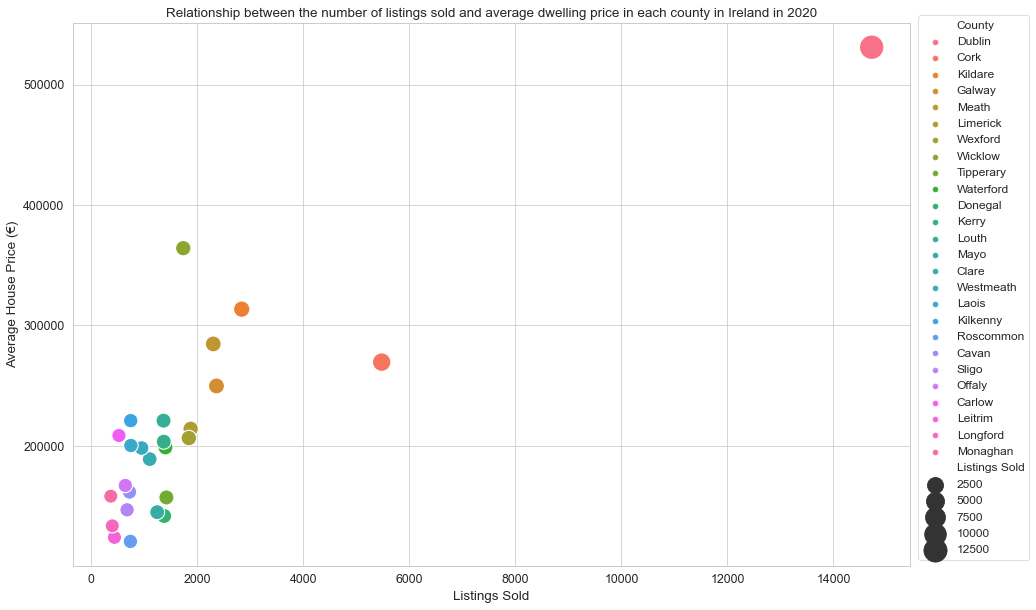

In [21]:
#Plotting the seaborn scatter plot.
sp = sns.scatterplot(x="Listings Sold", y="Price", data=listings_sold_county, hue="County", size="Listings Sold", sizes = (200,600))

#Setting the scatter plot title and axis titles.
sp.set(xlabel="Listings Sold", ylabel="Average House Price (€)", title="Relationship between the number of listings sold and average dwelling price in each county in Ireland in 2020")

#Anchoring the axis outside and to the right of the scatter plot.
sp.legend(bbox_to_anchor=(1.15, 0), loc='lower right', fontsize=12)

#Printing the scatter plot.
plt.show()

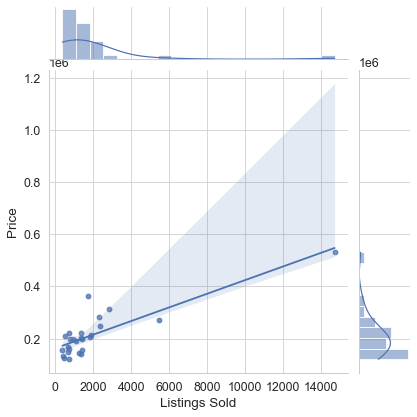

In [95]:
#Plotting the seaborn joint plot.
jp = sns.jointplot(x="Listings Sold", y="Price", data=listings_sold_county, kind='reg')

#Printing the scatter plot.
plt.show()

### Insight
##### The scatter plot shows that where more listings are sold, listings also become more expensive. Although this would suggest going against the rule of supply and demand driving price, it is infact what is driving the price of dwellings. As can be seen in the interactive geopandas chart earlier in this notebook, more listings are sold and are more expensive within and closer to major cities in Ireland such as Dublin, Wicklow, Kildare, Meath, Cork, Galway. There is a greater desire to live closer to major cities due to obvious reasons such as employment opportunities as well as having access to services such as education, health, public transport etc. This results in increased dwelling development in these areas and increased cost due to the high demand to live in those cities. 

##### Dublin is a clear outlier within the data both in terms of the price of dwellings and numbers sold. This is highlighted further by the jointplot histogram where the distribution of listing sold and dwelling price are rightward skewed and weighted towards <2000 dwelling sales per county and dwelling prices of ~€200,000 - €300,000. 

## Analysis of Dwelling prices and sales in Dublin between the years 2010 and 2020

##### As evidenced above, Dublin was a clear outlier regarding dwelling sales both in terms of the price of dwellings and the number of listings sold. Further analysis of dwelling sales in Dublin was therefore warrented. CSV files of sales from 2010 to 2020 were [available for download here.](https://data.smartdublin.ie/dataset/dublin-residential-property-price-register) Preparation, analysis and visualisation to outline dwelling sales information in various towns and districts in Dublin across and throughout a 10 year period is conducted below.

### Preparation
##### The initial data set contained house sales in 2020 from all counties in Ireland. A new DataFrame was created below named, "house_2020_dublin", which is a subset of the "house_2020" DataFrame containing only house prices in Dublin.

In [23]:
house_2020_dublin = house_2020[house_2020['County']=='Dublin']
house_2020_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9194,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9195,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9196,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9197,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",NaN,Dublin,360000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9198,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",NaN,Dublin,555066.07,No,Yes,New Dwelling house /Apartment,NaN


### Importing and Preparation.
##### [The remaining datasets containing information on dwelling sales in Dublin from 2010-2020 were downloaded here.](https://data.smartdublin.ie/dataset/dublin-residential-property-price-register). 

##### The previously defined function 'get_data_from_csv' is used to import all csv files and return them as Pandas DataFrames. The first 5 rows of each DataFrame are printed to ensure each DataFrame consisted of the same structure.

In [24]:
house_2019_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2019-dublin.csv')
house_2019_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2019,"2 LEIX RD, CABRA, DUBLIN 7",Dublin 7,Dublin,30000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
1,01/01/2019,"2 WOODALE VIEW, BALLYCULLEN, FIRHOUSE DUBLIN 24",Dublin 24,Dublin,30000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
2,01/01/2019,"APT 50, EARLSFIELD COURT, FRANCIS ST DUBLIN 8",Dublin 8,Dublin,15000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
3,02/01/2019,"3 Somerton Copse, Lucan",NaN,Dublin,290750.0,No,Yes,New Dwelling house /Apartment,NaN
4,02/01/2019,"31 ALL SAINTS PARK, RAHENY, DUBLIN 5",Dublin 5,Dublin,460000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [25]:
house_2018_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2018-dublin.csv')
house_2018_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,02/01/2018,"1 ABBEY ST, HOWTH, DUBLIN",Dublin 7,Dublin,710000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1,02/01/2018,"1 ROSEVILLE, LOWER ROAD, SHANKILL",Dublin 18,Dublin,627230.70,No,No,Second-Hand Dwelling house /Apartment,NaN
2,02/01/2018,"19 ULVERTON RD, DALKEY, DUBLIN",NaN,Dublin,1130000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
3,02/01/2018,"236 PHIBSBORO RD, DUBLIN 7, DUBLIN",Dublin 7,Dublin,277000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
4,02/01/2018,"3 COLLEGE COURT, PORTRANE ROAD, DONABATE",NaN,Dublin,348017.62,No,No,Second-Hand Dwelling house /Apartment,NaN


In [26]:
house_2017_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2017-dublin.csv')
house_2017_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2017,"1 PINTAIL HOUSE, REDCOURT OAKS, SEAFIELD RD EAST",Dublin 3,Dublin,242424.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
1,01/01/2017,"11 PINTAIL HOUSE, REDCOURT OAKS, SEAFIELD RD EAST",Dublin 3,Dublin,242424.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
2,01/01/2017,"124 SEAFIELD RD, CLONTARF, DUBLIN 3",Dublin 3,Dublin,535500.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
3,01/01/2017,"126 SEAFIELD RD, CLONTARF, DUBLIN 3",Dublin 3,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,01/01/2017,"128 SEAFIELD RD, CLONTARF, DUBLIN 3",Dublin 3,Dublin,535500.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN


In [27]:
house_2016_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2016-dublin.csv')
house_2016_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2016,"34 MOUNT PLEASANT TERRACE, RANELAGH, DUBLIN 6",Dublin 15,Dublin,170000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,04/01/2016,"13 Drury Mills, Saggart",NaN,Dublin,230088.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2016,"19 Drury Mills, Saggart",NaN,Dublin,321586.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
3,04/01/2016,"2 BRIGHTON SQ, BRIGHTON RD, FOXROCK DUBLIN 18",Dublin 18,Dublin,1150000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2016,"2 MOYOLA MEWS, LOWER CHURCHTOWN ROAD, DUBLIN 14",NaN,Dublin,330000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [28]:
house_2015_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2015-dublin.csv')
house_2015_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,02/01/2015,"108 THE HARDWICKE VILLAGE, NORTH BRUNSWICK ST,...",Dublin 7,Dublin,138000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,02/01/2015,"12 THE CEDARS, MONKSTOWN VALLEY, MONKSTOWN",NaN,Dublin,270000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,02/01/2015,"4 SHREWSBURY, BALLSBRIDGE, DUBLIN 4",Dublin 4,Dublin,900000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,03/01/2015,"46 HOLYWELL, UPR KILMACUD RD, DUBLIN 14",Dublin 14,Dublin,592000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,05/01/2015,"12 VILLA PARK AVE, NAVAN RD, DUBLIN 7",Dublin 7,Dublin,510000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [29]:
house_2014_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2014-dublin.csv')
house_2014_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,02/01/2014,"28 CHERRYFIELD RD, WALKINSTOWN, DUBLIN 12",NaN,Dublin,95000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,02/01/2014,"32 KILCROSS SQ, SANDYFORD, DUBLIN 18",NaN,Dublin,170000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,02/01/2014,"70 EDENMORE AVENUE, RAHENY, DUBLIN 5",NaN,Dublin,141000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,02/01/2014,"76 CABRA DR, PHIBSBOROUGH, DUBLIN 7",NaN,Dublin,155000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
4,03/01/2014,"18 ALBERT COLLEGE CRESCENT, GLASNEVIN, DUBLIN 9",NaN,Dublin,257500.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [30]:
house_2013_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2013-dublin.csv')
house_2013_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,02/01/2013,"11 Whites Gate, White's Road, Castleknock",NaN,Dublin,700352.42,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
1,02/01/2013,"13 Crosforge, Saggart, Co Dublin",NaN,Dublin,180616.74,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,02/01/2013,"2 Barnwell Terrace, Hansfield, Dublin 15",NaN,Dublin,147974.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
3,02/01/2013,"3 Stocking Wood Green, Stocking Avenue, Rathfa...",NaN,Dublin,280000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
4,02/01/2013,"56 Bargy Road, East Wall",Dublin 3,Dublin,160000.00,No,No,Second-Hand Dwelling house /Apartment,NaN


In [31]:
house_2012_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2012-dublin.csv')
house_2012_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2012,"78 Dollymount Park, Clontarf, Dublin 3",Dublin 3,Dublin,169525.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
1,02/01/2012,"Apartment 24, Fortfield Court, Terenure",Dublin 6w,Dublin,120000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
2,03/01/2012,"12 Brookwood Crescent, Artane, Dublin 5",Dublin 5,Dublin,90000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,03/01/2012,"182 Santry Close, Santry",NaN,Dublin,360000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,03/01/2012,"31 Glencairn Lawn, the gallops, sandyford",NaN,Dublin,255000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [32]:
house_2011_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2011-dublin.csv')
house_2011_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2011,"251 Clontarf Road, Clontarf",Dublin 3,Dublin,108532.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
1,04/01/2011,"22 St. Patrick's Park, Clondalkin",NaN,Dublin,360000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,04/01/2011,"46 Longmeadows, Islandbridge",Dublin 8,Dublin,254000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2011,"60 WOODSIDE, RATHFARNHAM, DUBLIN 14",Dublin 14,Dublin,445000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2011,"9 Shandon Crescent, Phibsboro, Dublin 7",NaN,Dublin,220000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN


In [33]:
house_2010_dublin = get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\ppr-2010-dublin.csv')
house_2010_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,04/01/2010,"12 Sallymount Avenue, Ranelagh",NaN,Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"206 Philipsburgh Avenue, Marino, Dublin 3",NaN,Dublin,430000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"22 Laverna Way, Castleknock, Dublin 15",NaN,Dublin,355000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


### Preparation

##### The next step was to join these tables vertically into one DataFrame called, "house_2010_2020_dublin". As each of the columns directly align, the pandas concatenation function was used. A description of the new DataFrame is then printed to show that the DataFrames had be successfully concatinated.

In [34]:
#Concatinating individual DataFrames from 2010-2020.
house_2010_2020_dublin = pd.concat([house_2020_dublin, house_2019_dublin, house_2018_dublin, house_2017_dublin, house_2016_dublin, house_2015_dublin, house_2014_dublin, house_2013_dublin, house_2012_dublin, house_2011_dublin, house_2010_dublin])

#Printing the description of the new DataFrame.
house_2010_2020_dublin.describe

<bound method NDFrame.describe of      Date of Sale (dd/mm/yyyy)  \
9194                02/01/2020   
9195                02/01/2020   
9196                02/01/2020   
9197                02/01/2020   
9198                02/01/2020   
...                        ...   
6930                28/12/2010   
6931                28/12/2010   
6932                30/12/2010   
6933                30/12/2010   
6934                30/12/2010   

                                                Address Postal Code  County  \
9194  12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...   Dublin 16  Dublin   
9195          125 MILL TOWN HALL, MT ST ANNES, MILLTOWN    Dublin 6  Dublin   
9196              16 STRATFORD HAVEN, RATHGAR, DUBLIN 6    Dublin 6  Dublin   
9197                 20 ST EITHNE ROAD, CABRA, DUBLIN 7         NaN  Dublin   
9198       4 Belarmine View, Belarmine Woods, Stepaside         NaN  Dublin   
...                                                 ...         ...     ...   
6930

### Preparation

##### The DataFrames have successfully concatenated as indicated by "[138667 rows x 9 columns]". The new DataFrame consists of 138,668 dwelling sales in Dublin between 2010 and 2020. The head of the new DataFrame, "house_2010_2020_dublin", is printed below. Following this the index is reset so that it begins at 0 and the DataFrame is renamed as 'dublin_house_prices'.

In [35]:
#printing head of new DataFrame, "house_2010_2020_dublin".
house_2010_2020_dublin.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9194,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9195,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9196,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9197,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",NaN,Dublin,360000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9198,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",NaN,Dublin,555066.07,No,Yes,New Dwelling house /Apartment,NaN


In [36]:
#Resetting the index to clean up the data
dublin_house_prices = house_2010_2020_dublin.reset_index()

### Analysis & Visualisation
##### A brief analysis is carried out below using the .describe() function and a histogram to visualise the distribution of dwelling sales at different prices between 2010 and 2020.

In [37]:
dublin_house_prices['Price'].describe()

count    1.386670e+05
mean     4.025331e+05
std      1.366046e+06
min      5.250000e+03
25%      2.065000e+05
50%      2.951542e+05
75%      4.300000e+05
max      1.823789e+08
Name: Price, dtype: float64

In [38]:
dublin_house_prices['Price'].median()

295154.18

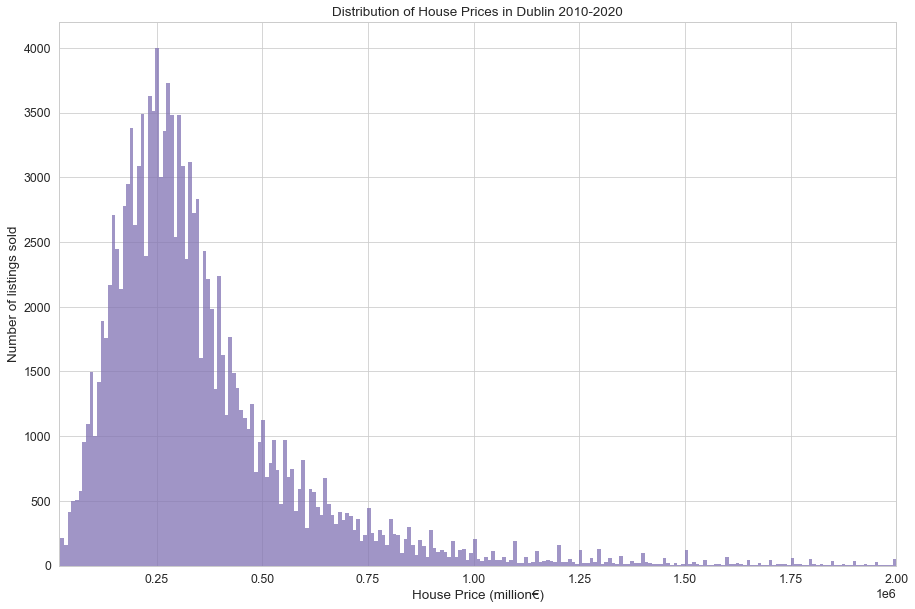

In [39]:
#Plotting a histogram showing the distribution of dwelling sales at different prices between 2010 and 2020.
price_hist = sns.histplot(x='Price', data=dublin_house_prices, color='m')

#Setting the title and axis titles. Although there are houses causing more that €2million, the x axis was limited to better visualise where the majority of sales did occur.
price_hist.set(xlabel="House Price (million€)", ylabel="Number of listings sold", title="Distribution of House Prices in Dublin 2010-2020", xlim=(20000, 2000000))
plt.show()

### Insight
##### The histogram above shows that housing prices in Dublin are positively skewed with the majority of dwelling sales clustered between ~ €125,000 - €400,000 and fewer dwellings sold at prices >€750,000. From our .describe() method we can see that the mean house price in Dublin between 2010 and 2020 is ~ €400,000, however the median house price of the dataset was €295154.18 which would suggest there are still many very expensive dwellings located in Dublin, the most expensive sold in excess of €180,000,000.

### Preparation

##### In order to be able to further analyse dwelling sales in Dublin, much preparation was required to clean and extract data from the address and postal code columns so that sales information could be grouped by town and district in Dublin. An initial step was to expand the address column so that we can further analyse house sales in different towns and districts in Dublin.

In [40]:
#Isolating the Address column so that it can be cleaned for more detailed on analysis of housing prices across different areas in Dublin.
address = dublin_house_prices[['Address']]
address

,Address
0,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB..."
1,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN"
2,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6"
3,"20 ST EITHNE ROAD, CABRA, DUBLIN 7"
4,"4 Belarmine View, Belarmine Woods, Stepaside"
...,...
138662,"89 Castledawson, Sion Hill Rock Road, Blackrock"
138663,"Apartment 2 The Orchard, 645 South Circular Ro..."
138664,"2 Merville Avenue, Stillorgan, County Dublin"
138665,"44 St. Johns Park West, Clondalkin, Dublin 22"


In [41]:
#Splitting the 'address' column by it's commas attempting to isolate the same information (addess 1, street, town, district etc.) into seperate columns.
house_dublin_splitaddress = dublin_house_prices['Address'].str.split(',', expand=True)
house_dublin_splitaddress

,0,1,2
0,12 WHITECLIFF,WHITECHURCH RD,RATHFARNHAM DUBLIN 16
1,125 MILL TOWN HALL,MT ST ANNES,MILLTOWN
2,16 STRATFORD HAVEN,RATHGAR,DUBLIN 6
3,20 ST EITHNE ROAD,CABRA,DUBLIN 7
4,4 Belarmine View,Belarmine Woods,Stepaside
...,...,...,...
138662,89 Castledawson,Sion Hill Rock Road,Blackrock
138663,Apartment 2 The Orchard,645 South Circular Road,Dublin 8
138664,2 Merville Avenue,Stillorgan,County Dublin
138665,44 St. Johns Park West,Clondalkin,Dublin 22


##### Unfortunately, after splitting the address column it can be seen that each address is writtin in a different format and therefore a different strategy is required to extract the town name and district.

### Preparation
##### The new strategy was to create a series of 'for loops' which will:
##### 1. Itterate over the 'Address' column and match town names within an external csv and populate them into a new column called "Town".
##### 2. Itterate over the 'Address' column and pull out strings that match "Dublin" + 1 or 2 numbers and fill in NaN values within the "Postal Code" column.
##### 3. Itterate over the newly created "Town" column and match the town name to the Dublin district and populate remaining NaN values within the "Postal Code" column.

##### This would hopfully clean the data sufficiently to allow for acceptable analysis of Dublin dwelling sales by Town and District.

*District refers to Dublin 1, Dublin 2, ...Dublin 24, North County Dublin, South County Dublin within the "Postal Code" column.

##### Below we can see that there are over 58,000 NaN values within the "Postal Code" column. This is >42% of the total data available and therefore not acceptable for analysis.

In [42]:
#Calculatingthe sum of the NaN values in the "Postal Code" column as a referenced starting point.
NaN_Postal = dublin_house_prices['Postal Code'].isna().sum()
NaN_Postal

58339

In [43]:
#Calculating the % of NaN values in the "Postal Code" column as a referenced starting point.
NaN_Postal/len(dublin_house_prices)*100

42.07129309785313

### Preparation
##### As part of the process of cleaning the data, the DataFrame below, 'df_dublin_dist', was created manually in order to have a reference for our for loops to match town names and postal codes. Much research was done to identify a suitable dataset to import directly from the internet, however no such dataset was identified and thus one was created manually from various sources.

In [44]:
#Using our defined function to create a Pandas Dataframe from our manually created CSV file.
df_dublin_dist = get_df_from_csv(r"C:\Users\Craig Dowling\OneDrive\Documents\UCD Professional Academy\Project\dublin district.csv")
df_dublin_dist.head(10)


,Post Code,Town
0,Dublin 1,abbey street
1,Dublin 1,amiens street
2,Dublin 1,capel street
3,Dublin 1,dorset street
4,Dublin 1,henry street
5,Dublin 1,mountjoy
6,Dublin 1,marlboro street
7,Dublin 1,north wall
8,Dublin 1,oconnell street
9,Dublin 1,parnell square


### Preparation
##### Below a set of town names is created which the for loop will use to match town names within the 'Address' column of the 'dublin_house_prices' DataFrame in Step 1 of our strategy. This is done by creating a for loop that iterates over the 'Town' column of the manually created DataFrame, "df_dublin_dist", and where the content of the column is not a float it will pull in the town name in lower case. 

In [45]:
towns_set_a = set()
for i in df_dublin_dist["Town"]:
    if type(i) != float:
        towns_set_a.add(i.lower())

print(towns_set_a)



{'donaghmede', 'killiney', 'sandymount', 'gloucesster square', 'dalkey', 'finglas', 'dun laoghaire', 'terenure', 'clonskeagh', 'wadelai', 'coney hill', 'ifsc', 'oldcourt', 'dawson street', 'glasnevin', 'rockbrook', 'bray', 'ballyfermot', 'north circular road', 'griffith ave', 'ringsend', 'tara st', 'priorswood', 'henry street', 'baggot street lower', 'oldtown', 'kinsealy', 'rolestown', 'wellington', 'tyrellstown', 'neilstown', 'ballinteer', 'riverside', 'palmerstown', 'portrane', 'glendowns', 'city west', 'corduff', 'amiens street', 'blanchardstown', 'leopardstown', 'elm mount', 'killester', 'merrion square', 'blackrock', 'fitzwilliam square', 'island bridge', 'glasthule', 'swords', 'walkinstown', 'smithfield', 'jamestown', 'kilternan', 'harolds cross', 'loughlinstown', 'nassau street', 'arbour hill', 'clonshaugh', 'garristown', 'artane', 'kilnamanagh', 'mount merrion', 'clondalkin', 'dartry', 'clonsilla', 'goatstown', 'balgriffin', 'lord edward street', 'georges street', 'clonliffe', 

### Preparation
##### Next the for loop is created which iterates over the "Address" column and matches its contents with the town names in the set above, "towns_set_a". If there is a match it will populate it into a newly created column, "Town".

In [46]:
#For each row in the range of the Dataframe
for i in range(138667):
   
    #Defining 'a' as the Address column in lower case.
    a = dublin_house_prices['Address'][i].lower()
    
    #For each town in the set of town names above ('towns_set_a'), if the town name is in the adress column of the DataFrame ('dublin_house_prices'), populate it into the new column called "Town".
    for t in towns_set_a:
        if t in a:
            dublin_house_prices.at[i, 'Town'] = t

#Print the head of the DataFrame below to observe change.            
dublin_house_prices.head()

,index,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Town
0,9194,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathfarnham
1,9195,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,milltown
2,9196,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathgar
3,9197,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",NaN,Dublin,360000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,cabra
4,9198,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",NaN,Dublin,555066.07,No,Yes,New Dwelling house /Apartment,NaN,stepaside


In [47]:
print("Number of NaN values in Postal Code column: " + str(dublin_house_prices['Postal Code'].isna().sum()))
print("Number of NaN values in Town column: " + str(dublin_house_prices['Town'].isna().sum()))

Number of NaN values in Postal Code column: 58339
Number of NaN values in Town column: 26232




##### We can now observe that the code successfully created a new column, 'Town', and populated >110,000 rows. This was step 1 completed. Now, another for loop is created aimed at populating NaN values in the "Postal Code" column by iterating over the "Address" column and pulling out a string = to "Dublin" + 1 or 2 numbers (Step 2).



In [48]:
import re

#For each row of the DataFrame "dublin_house_prices"...
for i in range(len(dublin_house_prices)):

    #If the data type within the Postal Code column is a float (i.e. is NaN) search the lower case of the Address column for a string containing "Dublin" + 1 or 2 numbers.
    
    if type(dublin_house_prices.at[i, "Postal Code"]) == float:
        a = dublin_house_prices['Address'][i].lower()

        result = re.search('dublin ([0-9]{1,2})', a)
       
        #If there is a match, populate the "Postal Code" column with "Dublin + [the identified number]" .
        if result is not None:
            dublin_house_prices.at[i, 'Postal Code'] = "Dublin`" + str(result.groups()[0])

#Print out the DataFrame.            
dublin_house_prices.head(10)

,index,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Town
0,9194,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathfarnham
1,9195,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,milltown
2,9196,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathgar
3,9197,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",Dublin`7,Dublin,360000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,cabra
4,9198,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",NaN,Dublin,555066.07,No,Yes,New Dwelling house /Apartment,NaN,stepaside
5,9199,02/01/2020,"41 Fairhaven Avenue, Castleknock Road, Castlek...",NaN,Dublin,660000.00,No,Yes,New Dwelling house /Apartment,NaN,castleknock
6,9200,02/01/2020,"5 WILLIAM BECKETT HOUSE, PEMBROKE ROW, DUBLIN",Dublin 2,Dublin,624600.00,No,No,Second-Hand Dwelling house /Apartment,NaN,pembroke
7,9201,02/01/2020,"7 HAYDENS PARK DR, LUCAN, DUBLIN",NaN,Dublin,478000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,lucan
8,9202,02/01/2020,"7 MAPLEWOOD RD, SPRINGFIELD, TALLAGHT DUBLIN 24",Dublin 24,Dublin,208000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,tallaght
9,9203,02/01/2020,"APARTMENT 311, SWIFTWOOD DEVELOPMENT, SAGGART",NaN,Dublin,250000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,saggart


In [49]:
print("Number of NaN values in Postal Code column is now: " + str(dublin_house_prices['Postal Code'].isna().sum()))

Number of NaN values in Postal Code column is now: 47067


##### Step 2 of the strategy has reduced the NaN count in the "Postal Code" column to 47,067, successfully populating >10,000 rows. 



### Preparation
##### The final step (step 3), was to create a for loop which will iterate over the "Postal Code" column, identify locations that contain NaN values and where identified, match the town name in the "Town" column with the district name in the "Post Code" column in the manually created 'df_dublin_dist' DataFrame.

In [50]:
a = df_dublin_dist[df_dublin_dist.Town == "abbey street"]
col = a.columns[0]
print(a)
a = a.set_index("Town")
print(a.loc["abbey street", "Post Code"])


  Post Code          Town
0  Dublin 1  abbey street
Dublin 1


In [51]:
df_dublin_dist.head(10)
#For each row in the DataFrame, "dublin_house_prices"...
for i in range(len(dublin_house_prices)):
        
        #If the content of the Postal Code is not NaN...
        if type(dublin_house_prices.at[i, "Postal Code"]) == float: 
            dhp_town = dublin_house_prices.at[i, "Town"]
           
            #if the content of the Town column is not NaN
            if  type(dhp_town) != float: 
                
                # If the town name in both dataframes match, fill in the missing post code in the Dublin_house_prices DataFrame.
                try:
                    matching_dist_row = df_dublin_dist[df_dublin_dist.Town ==  dhp_town]
                    matching_dist_row = matching_dist_row.set_index("Town")

                except Exception as e:
                    raise(e)
                    #continue
                
                dublin_house_prices.at[i, 'Postal Code'] = matching_dist_row.loc[dhp_town, "Post Code"]
dublin_house_prices.head(10)

,index,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Town
0,9194,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathfarnham
1,9195,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,milltown
2,9196,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathgar
3,9197,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",Dublin`7,Dublin,360000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,cabra
4,9198,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",Dublin 18,Dublin,555066.07,No,Yes,New Dwelling house /Apartment,NaN,stepaside
5,9199,02/01/2020,"41 Fairhaven Avenue, Castleknock Road, Castlek...",Dublin 15,Dublin,660000.00,No,Yes,New Dwelling house /Apartment,NaN,castleknock
6,9200,02/01/2020,"5 WILLIAM BECKETT HOUSE, PEMBROKE ROW, DUBLIN",Dublin 2,Dublin,624600.00,No,No,Second-Hand Dwelling house /Apartment,NaN,pembroke
7,9201,02/01/2020,"7 HAYDENS PARK DR, LUCAN, DUBLIN",Dublin 22,Dublin,478000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,lucan
8,9202,02/01/2020,"7 MAPLEWOOD RD, SPRINGFIELD, TALLAGHT DUBLIN 24",Dublin 24,Dublin,208000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,tallaght
9,9203,02/01/2020,"APARTMENT 311, SWIFTWOOD DEVELOPMENT, SAGGART",Dublin 24,Dublin,250000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,saggart


In [52]:
print("Number of NaN values in Postal Code column is now: " + str(dublin_house_prices['Postal Code'].isna().sum()))

Number of NaN values in Postal Code column is now: 5193


In [53]:
#% of NaN values in Postal Code column of Dublin_house_prices_sorted DataFrame
print("The % of NaN values in the Postal Code column is only " + str((dublin_house_prices["Postal Code"].isna().sum())/len(dublin_house_prices)*100) + "%. This is a samll % and will therefore have little impact on our further analysis into housing prices in the different districts of Dublin.")

The % of NaN values in the Postal Code column is only 3.7449429208102867%. This is a samll % and will therefore have little impact on our further analysis into housing prices in the different districts of Dublin.


##### Step 3 successfully populated >40,000 further rows bringing the total count of NaN values within the "Postal Code" column down to 5193 (down from an initial 58,339). This is only 3.7% of the total data available which will have little impact on our analysis of Dublin dwelling sales grouping by Dublin district.

### Preparation

##### Unfortunately upon further analysis it was found that, although NaN values were populated, there were some abnormal inputs within the "dublin_house_prices" DataFrame "Postal Code" column. This was discovered when attempting to group by Postal Code and receiving an error. The DataFrame was exported as a CSV for further analysis and the column was manually corrected within 5 minutes by using the 'find replace' function in excel to correct common errors. The clean CSV file was then imported and converted to a Pandas DataFrame. Finally, the DataFrame was reduced to only the required columns for further analysis and the index reset to begin from 0.

In [54]:
#Importing the clean CSV.
dublin_house_prices_sorted = pd.read_csv(r"C:\Users\Craig Dowling\OneDrive\Documents\UCD Professional Academy\Project\dublin_house_prices.csv", encoding= 'unicode_escape')

#Resetting the index.
dublin_house_prices_sorted.reset_index()

#Defining a new subsetted DataFrame containing only the required columns for analysis.
Dublin_house_prices_sorted = dublin_house_prices_sorted[["Date of Sale (dd/mm/yyyy)", "Address", "Postal Code", "County", "Price", "Description of Property", "Town"]]

#Printing the new DataFrame.
Dublin_house_prices_sorted

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Description of Property,Town
0,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,Second-Hand Dwelling house /Apartment,rathfarnham
1,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,Second-Hand Dwelling house /Apartment,milltown
2,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,Second-Hand Dwelling house /Apartment,rathgar
3,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",Dublin 7,Dublin,360000.00,Second-Hand Dwelling house /Apartment,cabra
4,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",Dublin 18,Dublin,555066.07,New Dwelling house /Apartment,stepaside
...,...,...,...,...,...,...,...
138662,28/12/2010,"89 Castledawson, Sion Hill Rock Road, Blackrock",Dublin 4,Dublin,510000.00,Second-Hand Dwelling house /Apartment,blackrock
138663,28/12/2010,"Apartment 2 The Orchard, 645 South Circular Ro...",Dublin 8,Dublin,185022.00,New Dwelling house /Apartment,south circular road
138664,30/12/2010,"2 Merville Avenue, Stillorgan, County Dublin",Dublin 4,Dublin,44440.83,Second-Hand Dwelling house /Apartment,stillorgan
138665,30/12/2010,"44 St. Johns Park West, Clondalkin, Dublin 22",Dublin 22,Dublin,225000.00,Second-Hand Dwelling house /Apartment,clondalkin


### Preparation
##### Below a new DataFrame is created which shows the average costs of dwellings in each of the Dublin districts.

In [55]:
dhps = Dublin_house_prices_sorted.groupby("Postal Code")["Price"].mean()
house_price_per_district = pd.DataFrame(dhps).sort_values("Price", ascending=False)
house_price_per_district_i = house_price_per_district.reset_index()

### Visualisation
##### Below a horizontal bar plot is created to visualise the average dwelling price in each District in Dublin.

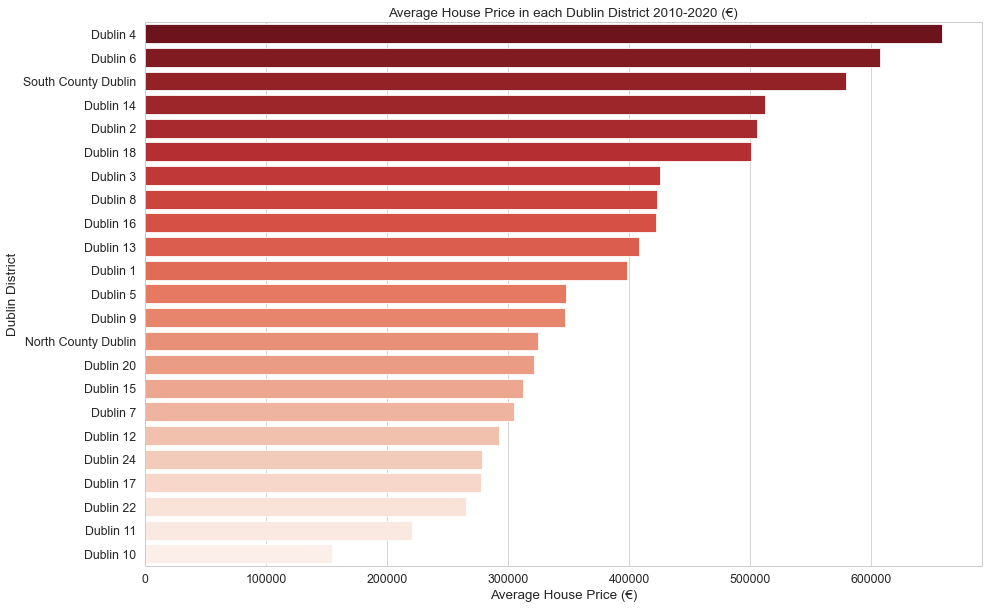

In [56]:
dub_dist_house_plot = sns.barplot(y="Postal Code", x="Price", data=house_price_per_district_i, palette="Reds_r")
dub_dist_house_plot.set(xlabel='Average House Price (€)', ylabel='Dublin District', title="Average House Price in each Dublin District 2010-2020 (€)")
plt.show()

### Visualisation

##### Although the barchart is a simple visualisation of the average dwelling price per district in Dublin, if one is not familiar with the layouts of Dublin it is difficult to visualise where each district is located. To improve the readers experience of this data, a geopandas interactive map is created below where readers can hover over each of the Dublin districts and see the information portrayed in the barchart above.

Shape file available for download [HERE.](https://zenodo.org/record/4284592#.YlLs6OfMLrc) (McGuinness, S., 2020)

In [57]:
#Importing geopandas Dublinlin map shape file.
dub_shape = gpd.read_file(r"C:\Users\Craig Dowling\Downloads\dublin_postcodes.zip!dublin_postcodes/Postcode_dissolve.shp")

#Ensuring the data type is a GeoDataFrame.
type(dub_shape)

geopandas.geodataframe.GeoDataFrame

In [58]:
house_price_per_district_i.head(2)

,Postal Code,Price
0,Dublin 4,658278.766035
1,Dublin 6,606925.734943


In [59]:
#Renaming column "Yelp_postc" as "Postal Code", so that it can be used as a key for merging between DataFrames "house_price_per_district_i" and dub_shape.
dub_shape = dub_shape.rename(columns = {"Yelp_postc": "Postal Code"})

#Merging 'irl_shape' and 'listings_sold_county' via irl_shape to maintain geodataframe rather than normal pandas dataframe.
dub_geo_df = dub_shape.merge(house_price_per_district_i, on="Postal Code", how='right')

dub_geo_df

,Postal Code,geometry,Price
0,Dublin 4,"POLYGON ((318707.918 234038.963, 318784.900 23...",658278.766035
1,Dublin 6,"POLYGON ((316734.938 232409.790, 316778.736 23...",606925.734943
2,South County Dublin,"MULTIPOLYGON (((327725.163 226488.393, 327770....",578833.486760
3,Dublin 14,"POLYGON ((317420.557 230644.051, 317427.114 23...",512517.727521
4,Dublin 2,"POLYGON ((315452.278 232444.163, 315386.068 23...",505764.719478
5,Dublin 18,"POLYGON ((320085.236 226289.150, 320069.927 22...",500397.390808
6,Dublin 3,"POLYGON ((318034.251 236800.004, 318083.576 23...",425093.253974
7,Dublin 8,"POLYGON ((313482.094 234322.835, 313535.361 23...",423331.890243
8,Dublin 16,"POLYGON ((312682.400 227779.478, 312686.689 22...",422318.462303
9,Dublin 13,"MULTIPOLYGON (((324073.470 241251.565, 324112....",407877.615280


In [60]:
#Converting geo_df_clean (geopandas dataframe) to json file type("irl_shape_json")
dub_shape_json = json.loads(dub_geo_df.to_json())
type(dub_shape_json)

dict

In [61]:
#Converting "irl_shape_json" from dictionary type to string type so that it can be read by the GeoJSONDataSource package.
dub_json_data = json.dumps(dub_shape_json)
type(dub_json_data)

str

In [62]:
#Using GeoJSONDataSource to create the interactive map data source.
dub_geo_source = GeoJSONDataSource(geojson = dub_json_data)

#Choosing the colour palette from the Bokeh website.
palette_dub=brewer["OrRd"][6]

#Inverting the colour palette so that the darkest colours are the districts with the most expensive dwellings.
palette_dub=palette_dub[::-1]

#Setting the colour mapper to the palette and setting the high and low ranges according to roughly the least and most expensive average dwelling costs per district.
color_mapper_dub = LinearColorMapper(palette=palette_dub, low=120000, high=700000)

#Inserting a colour mapper.
color_bar_dub = ColorBar(color_mapper=color_mapper_dub)

#Inserting a hover tool which will show the name of the district and average dwelling price in each county.
hover1 = HoverTool(tooltips = [('Dublin District', '@{Postal Code}'), ('Average Dwelling Price', '@Price')])

#Inserting the figure head and mapping tool to enable interaction with chart.
ghg_map1 = figure(title = "Average Dwelling Prices in Dublin by District", tools=[hover1])

#Mapping the colour bar to the right of the interactive chart.
ghg_map1.add_layout(color_bar_dub, 'right')

#Defining the content of the chart (data source, filed which will define colour, line colour showing county borders).
ghg_map1.patches(source = dub_geo_source, fill_color={'field':'Price', 'transform':color_mapper_dub}, line_color='black')

#Removing the axis as it did not add value.
ghg_map1.axis.visible = False

In [63]:
#Running this will open the interactive map in a new window.
show(ghg_map1)

In [64]:
#Grouping the DataFrame by "Postal Code" and aggregating the mean, min and max prices.
DHP = Dublin_house_prices_sorted.groupby("Postal Code").agg({'Price':['mean', 'min', 'max']})

#Creating a new DataFrame
house_price_per_district_extended = pd.DataFrame(DHP)

#Sorting the Postal Codes by mean price so that it reflects the bar chart above.
house_price_per_district_extended.sort_values([('Price', 'mean')], ascending=False)


Price                        
                              mean       min           max
Postal Code                                               
Dublin 4             658278.766035   5280.00  8.792818e+07
Dublin 6             606925.734943   5250.00  4.987500e+07
South County Dublin  578833.486760   6000.00  1.144408e+08
Dublin 14            512517.727521   5500.00  4.203672e+07
Dublin 2             505764.719478   7000.00  8.442080e+07
Dublin 18            500397.390808   5500.00  9.976297e+07
Dublin 3             425093.253974   5715.00  3.451514e+07
Dublin 8             423331.890243   5500.00  1.391650e+08
Dublin 16            422318.462303   6500.00  1.040000e+07
Dublin 13            407877.615280  10000.00  5.211384e+07
Dublin 1             398572.773372   7300.00  1.342610e+08
Dublin 5             348031.416652   5400.00  6.628145e+07
Dublin 9             346889.398798   6500.00  4.832400e+07
North County Dublin  324646.673397   6000.00  2.106230e+07
Dublin 20            321126.765321   5675.00  3.418855e+07
Dublin 15            312331.007726   7000.00  2.643172e+07
Dublin 7             305018.930397   5900.00  1.830000e+07
Dublin 12            292349.187294   6000.00  2.021652e+07
Dublin 24            278137.171541   8000.00  6.408506e+07
Dublin 17            278031.583076   9521.96  3.960700e+07
Dublin 22            264992.224317   7200.00  2.687333e+07
Dublin 11            220539.781328   6250.00  3.529177e+07
Dublin 10            154531.781188   8400.00  8.425000e+05

### Insight
We can observe from the bar chart and interactive geopandas map above that the most expensive locations to live in Dublin on average are those surrounding Dublin City Centre and south of the city centre along the coastline. Further insight below shows that although Dublin dwelling prices in Dublin 4 are the most expensive on average, houses sold in excess of €100 million were sold in South County Dublin, Dublin 8 and Dublin 1.

### Preparation and Analysis

##### Although there are 26232 NaN values within the "Town" column of the "dublin_house_prices" DataFrame, there are still >110,000 datapoints available for analysis. Below analysis will be conducted to identify the most expensive towns in Dublin to purchase a dwelling and the number of dwellings sold there in the past 10 years.

In [65]:
#Grouping by Town and calculating the mean price of dwellings.
average_price_per_town = dublin_house_prices.groupby("Town")["Price"].mean()

#Creating a new DataFrame
df_appt = pd.DataFrame(average_price_per_town)

#Sorting DataFrame values by average price from most expensive to least expensive.
average_price_per_town_sorted = df_appt.sort_values("Price", ascending=False)

#Printing the head of the new DataFrame
average_price_per_town_sorted.head()

,Price
Town,
dawson street,1.721593e+06
baily,1.537387e+06
fitzwilliam square,1.450714e+06
st stephens green,1.142365e+06
dartry,1.097727e+06


In [66]:
#Grouping by Town and getting the count of listings sold 
listings_per_town = dublin_house_prices.groupby("Town")["Address"].count()

#Creating a new DataFrame
df_lpt = pd.DataFrame(listings_per_town)

#Sorting DataFrame values by listings sold from most sold to least sold
listings_per_town_sorted = df_lpt.sort_values("Address", ascending=False)

#Printing the head of the new DataFrame
listings_per_town_sorted.head()

,Address
Town,
swords,4103
lucan,4065
castleknock,3219
malahide,3180
rathfarnham,3056


In [67]:
#Joining DataFrames to highlight the number of sales that make up the average price of dwellings per town.

price_v_listings = average_price_per_town_sorted.join(listings_per_town_sorted)
price_v_listings.head(20)

,Price,Address
Town,,
dawson street,1.721593e+06,3
baily,1.537387e+06,29
fitzwilliam square,1.450714e+06,7
st stephens green,1.142365e+06,11
dartry,1.097727e+06,160
ballsbridge,9.262785e+05,1113
dalkey,8.765422e+05,824
summerhill,8.745672e+05,92
rathgar,8.475350e+05,930


### Insight
##### From the analysis above it can be seen that although areas such as Dawson Street and Fitzwilliam Square are two of the three most expensive areas to live in, more impressive are areas such as Darty that has 164 making up an average dwelling price in excess of €1 million and Ballsbridge which has 1294 listings sold at an average of close to €900,000.

## Analysis of Inflation of Dublin Dwelling Prices, Rent Cost and Income per Person from 2010 - 2019
##### Below preparation and analysis is conducted to visualise the rising trend in dwelling prices, rent cost and income in Dublin from 2010 to 2019 and how they each relate to each other.

### Preparation & Analysis

##### A dataset was identified showing various statistics including information on total rent costs and average income per person in counties and regions in Ireland.

The dataset is available to [download here](https://data.gov.ie/dataset/cia02-estimates-of-household-income) (DATA.GOV.IE, 2021)

##### A brief analysis of the dataset is conducted to establish an understanding of the content of the dataset.

In [68]:
#Using pre-defined function to import CSV and convert it to Panda DataFrame
DF_income= get_df_from_csv(r'C:\Users\Craig Dowling\Downloads\CIA02.20220401T080438.csv')

#Printing the head of the DataFrame for initial observation
DF_income.head()

,"ï»¿""Statistic""",Year,County and Region,UNIT,VALUE
0,Compensation of Employees (i.e. Wages and Sala...,2000,State,Euro Million,42023.0
1,Compensation of Employees (i.e. Wages and Sala...,2000,Northern and Western,Euro Million,5749.0
2,Compensation of Employees (i.e. Wages and Sala...,2000,Border,Euro Million,2542.0
3,Compensation of Employees (i.e. Wages and Sala...,2000,Leitrim,Euro Million,203.0
4,Compensation of Employees (i.e. Wages and Sala...,2000,Sligo,Euro Million,512.0


In [69]:
#Inspecting the info of the DataFrame
DF_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ï»¿"Statistic"     11100 non-null  object 
 1   Year               11100 non-null  int64  
 2   County and Region  11100 non-null  object 
 3   UNIT               11100 non-null  object 
 4   VALUE              11100 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 433.7+ KB


In [70]:
#Inspecting the different values within the "Statistics" column so that the appropriate values can be identified.
DF_income.groupby('ï»¿"Statistic"')["VALUE"].count()

ï»¿"Statistic"
Compensation of Employees (i.e. Wages and Salaries, Benefits in kind, Employers' social insurance contribution)      740
Current Taxes on Income                                                                                              740
Disposable Household Income                                                                                          740
Disposable Income per Person                                                                                         740
Disposable Income per Person (excluding Rent)                                                                        740
Income of Self Employed                                                                                              740
Index of Disposable Income per Person                                                                                740
Index of Disposable Income per Person (excluding Rent)                                                               740
Index of Total In

#### Preparation
Now that the various values are identified, new DataFrames can be created limited to the two values of concern in the "Statistics" column - "Total Income per Person" & "Rent of dwellings (including imputed rent of owner-occupied dwellings". Once these DataFrames are completed they are further refined to include only values Dublin and for years greater than 2009, i.e. 2010 - 2019 so that they can later be analysed along side dwelling prices in Dublin during this timeframe.

In [71]:
#Creating a DataFrame, "Income_PP", limited to where the value in the "Statistic" column is equal to "Total Income Per Person".

Income_pp = DF_income['ï»¿"Statistic"'] == "Total Income per Person"
Income_PP = DF_income[Income_pp]
Income_PP

,"ï»¿""Statistic""",Year,County and Region,UNIT,VALUE
5180,Total Income per Person,2000,State,Euro,17833.0
5181,Total Income per Person,2000,Northern and Western,Euro,15167.0
5182,Total Income per Person,2000,Border,Euro,14397.0
5183,Total Income per Person,2000,Leitrim,Euro,14880.0
5184,Total Income per Person,2000,Sligo,Euro,15018.0
...,...,...,...,...,...
5915,Total Income per Person,2019,Midland,Euro,23203.0
5916,Total Income per Person,2019,Laois,Euro,23163.0
5917,Total Income per Person,2019,Longford,Euro,22127.0
5918,Total Income per Person,2019,Offaly,Euro,22749.0


In [72]:
##Creating a DataFrame, "Rent" limited to where the value in the "Statistic" column is equal to "Rent of dwellings (including imputed rent of owner-occupied dwellings)".

rent = DF_income['ï»¿"Statistic"'] == "Rent of dwellings (including imputed rent of owner-occupied dwellings)"
Rent = DF_income[rent]
Rent

,"ï»¿""Statistic""",Year,County and Region,UNIT,VALUE
1480,Rent of dwellings (including imputed rent of o...,2000,State,Euro Million,3598.0
1481,Rent of dwellings (including imputed rent of o...,2000,Northern and Western,Euro Million,514.0
1482,Rent of dwellings (including imputed rent of o...,2000,Border,Euro Million,203.0
1483,Rent of dwellings (including imputed rent of o...,2000,Leitrim,Euro Million,18.0
1484,Rent of dwellings (including imputed rent of o...,2000,Sligo,Euro Million,44.0
...,...,...,...,...,...
2215,Rent of dwellings (including imputed rent of o...,2019,Midland,Euro Million,520.0
2216,Rent of dwellings (including imputed rent of o...,2019,Laois,Euro Million,151.0
2217,Rent of dwellings (including imputed rent of o...,2019,Longford,Euro Million,62.0
2218,Rent of dwellings (including imputed rent of o...,2019,Offaly,Euro Million,138.0


In [73]:
type(Income_PP[["Year"]])

pandas.core.frame.DataFrame

In [74]:
#Refining the DataFrame, "Income_PP" to include only rows where the "County and Region" column are equal to Dublin.
Income_pp_Dublin = Income_PP['County and Region']=="Dublin"

#Creating a new DataFrame
Income_PP_Dublin = Income_PP[Income_pp_Dublin]

#Refining the DataFrame, "Income_PP", further to include only rows where the "Year" column are >2009, i.e. from 2010 - 2019
Income_pp_Dublin_10_19 = Income_PP_Dublin['Year'] > 2009

#Creating a new DataFrame
Income_PP_Dublin_10_19 = Income_PP_Dublin[Income_pp_Dublin_10_19]
Income_PP_Dublin_10_19

,"ï»¿""Statistic""",Year,County and Region,UNIT,VALUE
5576,Total Income per Person,2010,Dublin,Euro,29225.0
5613,Total Income per Person,2011,Dublin,Euro,29388.0
5650,Total Income per Person,2012,Dublin,Euro,30841.0
5687,Total Income per Person,2013,Dublin,Euro,30844.0
5724,Total Income per Person,2014,Dublin,Euro,31590.0
5761,Total Income per Person,2015,Dublin,Euro,32998.0
5798,Total Income per Person,2016,Dublin,Euro,34144.0
5835,Total Income per Person,2017,Dublin,Euro,35777.0
5872,Total Income per Person,2018,Dublin,Euro,37406.0
5909,Total Income per Person,2019,Dublin,Euro,38903.0


In [75]:
#Refining the DataFrame, "Rent" to include only rows where the "County and Region" column are equal to Dublin.
rent_Dublin = Rent['County and Region']=="Dublin"

#Creating a new DataFrame
rent_Dublin = Rent[rent_Dublin]

#Refining the DataFrame, "Rent", further to include only rows where the "Year" column are >2009, i.e. from 2010 - 2019
rent_Dublin_10_19 = rent_Dublin['Year'] > 2009

#Creating a new DataFrame
rent_Dublin_10_19 = rent_Dublin[rent_Dublin_10_19]
rent_Dublin_10_19

,"ï»¿""Statistic""",Year,County and Region,UNIT,VALUE
1876,Rent of dwellings (including imputed rent of o...,2010,Dublin,Euro Million,2550.0
1913,Rent of dwellings (including imputed rent of o...,2011,Dublin,Euro Million,2740.0
1950,Rent of dwellings (including imputed rent of o...,2012,Dublin,Euro Million,2861.0
1987,Rent of dwellings (including imputed rent of o...,2013,Dublin,Euro Million,2558.0
2024,Rent of dwellings (including imputed rent of o...,2014,Dublin,Euro Million,2710.0
2061,Rent of dwellings (including imputed rent of o...,2015,Dublin,Euro Million,3140.0
2098,Rent of dwellings (including imputed rent of o...,2016,Dublin,Euro Million,3752.0
2135,Rent of dwellings (including imputed rent of o...,2017,Dublin,Euro Million,3973.0
2172,Rent of dwellings (including imputed rent of o...,2018,Dublin,Euro Million,4569.0
2209,Rent of dwellings (including imputed rent of o...,2019,Dublin,Euro Million,5132.0


### Visualisation

##### Below a seaborn line plot is created to visualise the rise in average income per person and dwelling rent cost in Dublin from the year 2010 - 2019.

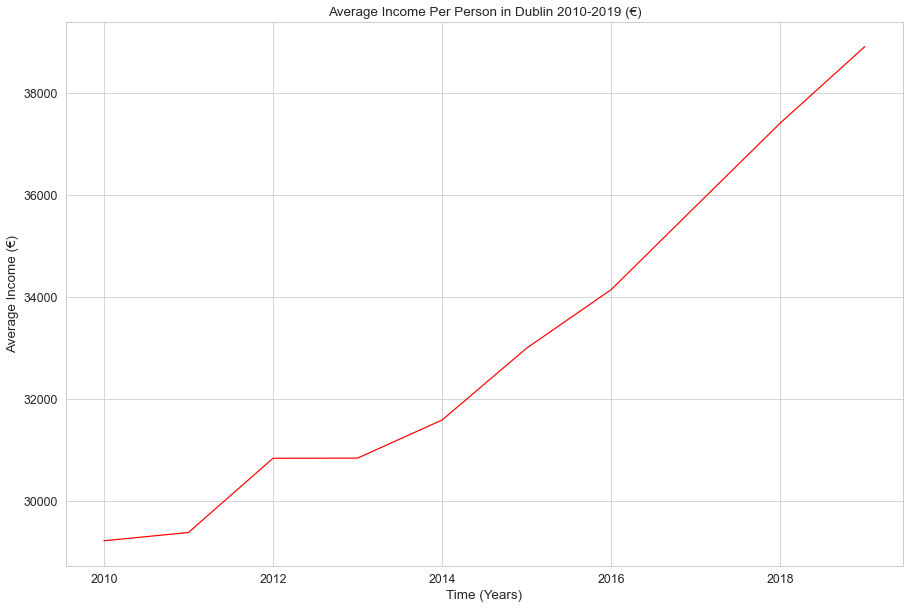

In [76]:
#Plotting the seaborn line plot
plot_income=sns.lineplot(x=Income_PP_Dublin_10_19["Year"], y=Income_PP_Dublin_10_19["VALUE"], color="red")

# Setting the line plot titel and axis titles
plot_income.set(xlabel='Time (Years)', ylabel='Average Income (€)', title="Average Income Per Person in Dublin 2010-2019 (€)")

#Printing the plot.
plt.show()

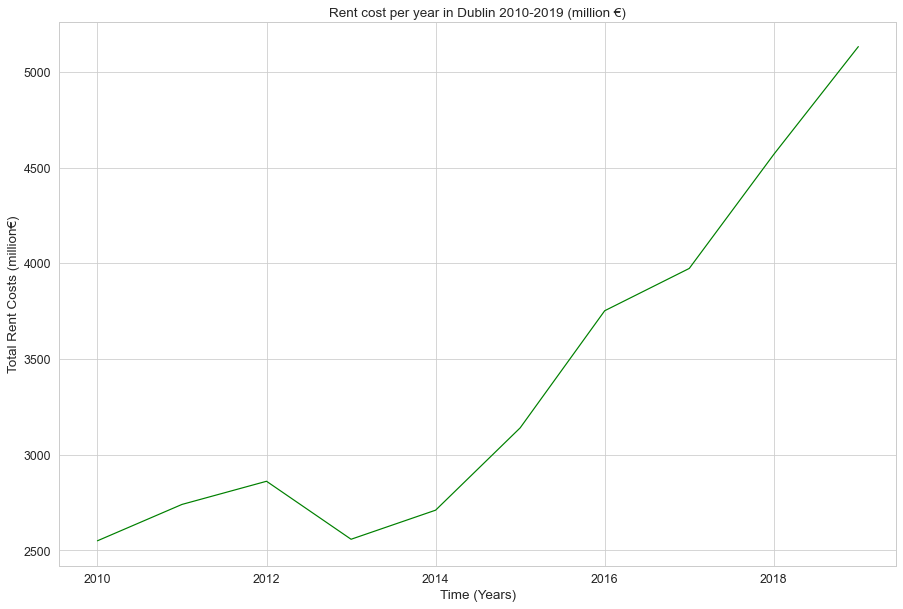

In [77]:
#Plotting the seaborn line plot
plot_Rent=sns.lineplot(x=rent_Dublin_10_19["Year"], y=rent_Dublin_10_19["VALUE"], color="green")

# Setting the line plot titel and axis titles
plot_Rent.set(xlabel='Time (Years)', ylabel='Total Rent Costs (million€)', title="Rent cost per year in Dublin 2010-2019 (million €)")

#Printing the plot.
plt.show()

### Preparation

##### Below the "dublin_house_prices" DataFrame is prepared so that is can be grouped by year and the same analysis as both average income per person and rent cost can be conducted. In order for this to happen, the "Date of Sale" column must be parsed as Time/Series data.

In [78]:
#Parsing date as time/series format and setting as index so that a new column can be created to group dwelling sales by year.

dublin_house_prices["Date of Sale"]=pd.to_datetime(dublin_house_prices["Date of Sale (dd/mm/yyyy)"], dayfirst=True)

dublin_house_prices.set_index("Date of Sale", inplace=True)

dublin_house_prices.head()

,index,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Town
Date of Sale,,,,,,,,,,,
2020-01-02,9194,02/01/2020,"12 WHITECLIFF, WHITECHURCH RD, RATHFARNHAM DUB...",Dublin 16,Dublin,565000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathfarnham
2020-01-02,9195,02/01/2020,"125 MILL TOWN HALL, MT ST ANNES, MILLTOWN",Dublin 6,Dublin,588500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,milltown
2020-01-02,9196,02/01/2020,"16 STRATFORD HAVEN, RATHGAR, DUBLIN 6",Dublin 6,Dublin,232500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,rathgar
2020-01-02,9197,02/01/2020,"20 ST EITHNE ROAD, CABRA, DUBLIN 7",Dublin`7,Dublin,360000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,cabra
2020-01-02,9198,02/01/2020,"4 Belarmine View, Belarmine Woods, Stepaside",Dublin 18,Dublin,555066.07,No,Yes,New Dwelling house /Apartment,NaN,stepaside


In [79]:
#Resetting index to create "Date of Sale" column.
df1 = dublin_house_prices.reset_index()

#Creating a "Year" column in our new dataframe, "df1".
df1 ['Year'] = df1['Date of Sale'].dt.year

#Creating a new series, "DF1", which groups average dwelling price per year in Dublin.
DF1 = df1.groupby('Year')['Price'].mean()

#Creating a dataframe from series, "DF1", and resetting the index.
Average_Price_Per_Year_dublin = pd.DataFrame(DF1)
Average_Price_Per_Year_Dublin = Average_Price_Per_Year_dublin.reset_index()
Average_Price_Per_Year_Dublin

,Year,Price
0,2010,333028.360568
1,2011,309263.164387
2,2012,280516.142434
3,2013,326729.194227
4,2014,362162.853388
5,2015,351037.784917
6,2016,405135.701306
7,2017,419643.139455
8,2018,469313.896159
9,2019,482560.659557


### Visualisation
##### Now that the data is correctly formatted into a new DataFrame, "Average_Price_Per_Year_Dublin", a seaborn line plot can be created to show the rising trend in dwelling prices from 2010 to 2019.

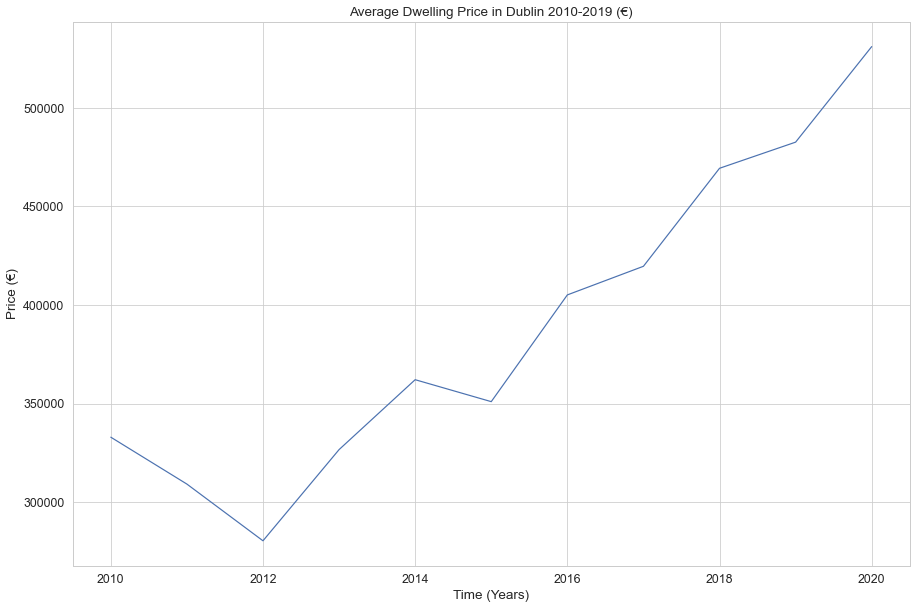

In [80]:
#Plotting the average price per house in Dublin from 2010 - 2019.
plot_house_prices=sns.lineplot(x=Average_Price_Per_Year_Dublin["Year"], y=Average_Price_Per_Year_Dublin["Price"])

#Setting the plot title and axis titles.
plot_house_prices.set(xlabel='Time (Years)', ylabel='Price (€)', title="Average Dwelling Price in Dublin 2010-2019 (€)")
plt.show()

### Preparation
##### In order to be able to visualise direct comparison between dwelling costs, income per person and rent costs in Dublin, the three DataFrames must first be merged. This data preparation is outlined below.

In [81]:
#First merging the Dataframes "Average_Price_Per_Year_Dublin" and "Income_PP_Dublin_10_19" on the common key, "Year".
house_price_v_income = Average_Price_Per_Year_Dublin.merge(Income_PP_Dublin_10_19, on='Year')

#Further merging the DataFrame "rent_Dublin_10_19" onto our new DataFrame "house_price_v_income" and setting suffixes to differentiate columns with the same headings.
house_price_v_rent_v_income = house_price_v_income.merge(rent_Dublin_10_19, on="Year", suffixes=('_income pp', '_rent'))

#Printing the new DataFrame
house_price_v_rent_v_income

,Year,Price,"ï»¿""Statistic""_income pp",County and Region_income pp,UNIT_income pp,VALUE_income pp,"ï»¿""Statistic""_rent",County and Region_rent,UNIT_rent,VALUE_rent
0,2010,333028.360568,Total Income per Person,Dublin,Euro,29225.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,2550.0
1,2011,309263.164387,Total Income per Person,Dublin,Euro,29388.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,2740.0
2,2012,280516.142434,Total Income per Person,Dublin,Euro,30841.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,2861.0
3,2013,326729.194227,Total Income per Person,Dublin,Euro,30844.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,2558.0
4,2014,362162.853388,Total Income per Person,Dublin,Euro,31590.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,2710.0
5,2015,351037.784917,Total Income per Person,Dublin,Euro,32998.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,3140.0
6,2016,405135.701306,Total Income per Person,Dublin,Euro,34144.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,3752.0
7,2017,419643.139455,Total Income per Person,Dublin,Euro,35777.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,3973.0
8,2018,469313.896159,Total Income per Person,Dublin,Euro,37406.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,4569.0
9,2019,482560.659557,Total Income per Person,Dublin,Euro,38903.0,Rent of dwellings (including imputed rent of o...,Dublin,Euro Million,5132.0


### Visualisation

##### Below, three line plots are created to visualise the relationship between inflation in:

##### 1. Dwelling Price and Average Income per Person
##### 2. Dwelling Price and Rent Cost
##### 3. Average Income per Person and Rent Cost

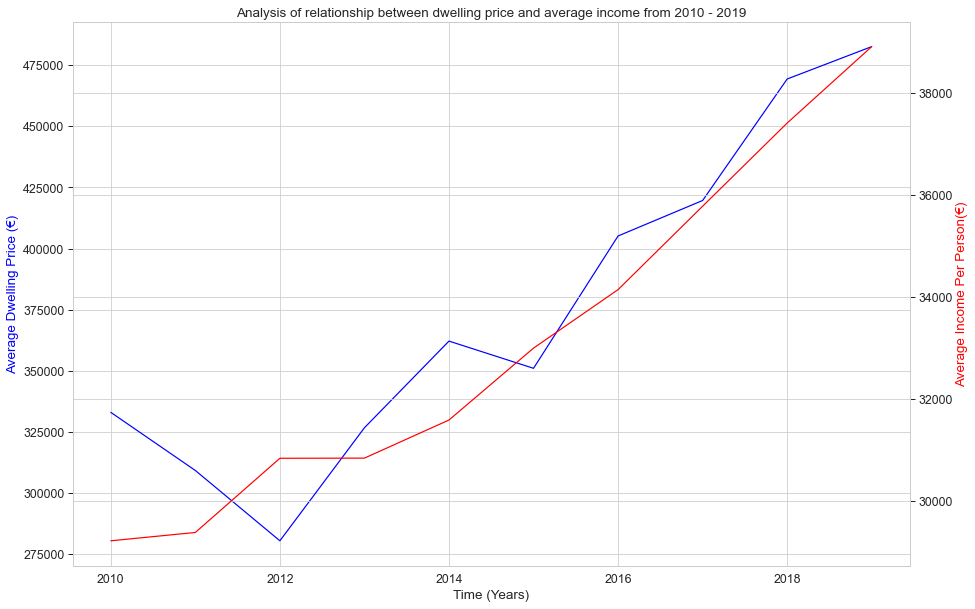

In [82]:
#Outlining the format used to write the plot
fig, ax = plt.subplots()

#Plotting the average dwelling costs over time on the left y-axis.
ax.plot(house_price_v_income["Year"], house_price_v_income["Price"], color='blue')

#Setting the x axis title
ax.set_xlabel('Time (Years)')

#Setting the left y axis title
ax.set_ylabel('Average Dwelling Price (€)', color='blue')

#Setting the line plot title
ax.set_title('Analysis of relationship between dwelling price and average income from 2010 - 2019')

#Creating a twin y axis on the right side of the line plot
ax2 = ax.twinx()

#Plotting the average income per person over time on the right y axis
ax2.plot(house_price_v_income["Year"], house_price_v_income["VALUE"], color='red')

#Setting the right y axis label.
ax2.set_ylabel('Average Income Per Person(€)', color = 'red')

#Printing the plot.
plt.show()

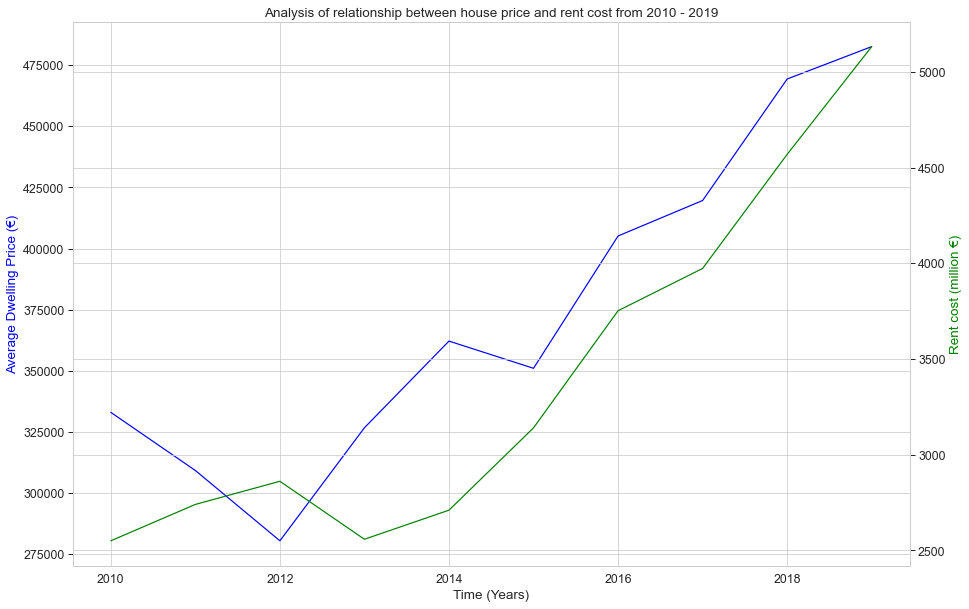

In [83]:
#Outlining the format used to write the plot
fig, ax = plt.subplots()

#Plotting the average dwelling costs over time on the left y-axis.
ax.plot(house_price_v_rent_v_income["Year"], house_price_v_rent_v_income["Price"], color='blue')

#Setting the x axis title
ax.set_xlabel('Time (Years)')

#Setting the left y axis title
ax.set_ylabel('Average Dwelling Price (€)', color='blue')

#Setting the line plot title
ax.set_title('Analysis of relationship between house price and rent cost from 2010 - 2019')

#Creating a twin y axis on the right side of the line plot
ax2 = ax.twinx()

#Plotting rent cost over time on the right y axis
ax2.plot(house_price_v_rent_v_income["Year"], house_price_v_rent_v_income["VALUE_rent"], color='green')

#Setting the right y axis label.
ax2.set_ylabel('Rent cost (million €)', color = 'green')

#Printing the plot.
plt.show()

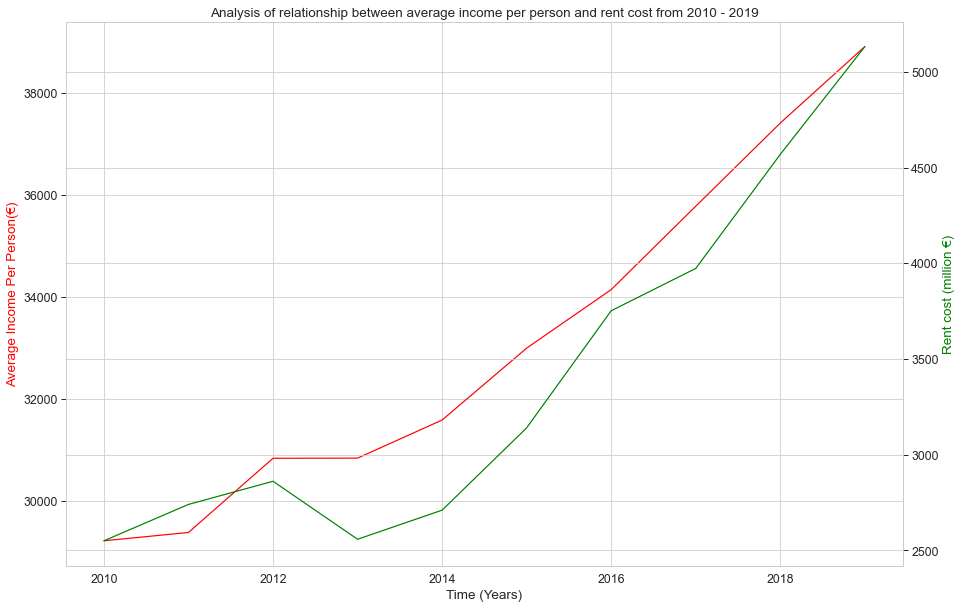

In [84]:
#Outlining the format used to write the plot
fig, ax = plt.subplots()

#Plotting the average income per person over time on the left y-axis.
ax.plot(house_price_v_rent_v_income["Year"], house_price_v_rent_v_income["VALUE_income pp"], color='red')

#Setting the x axis title
ax.set_xlabel('Time (Years)')

#Setting the left y axis title
ax.set_ylabel('Average Income Per Person(€)', color='red')

#Setting the line plot title
ax.set_title('Analysis of relationship between average income per person and rent cost from 2010 - 2019')

#Creating a twin y axis on the right side of the line plot
ax2 = ax.twinx()

#Plotting rent cost over time on the right y axis
ax2.plot(house_price_v_rent_v_income["Year"], house_price_v_rent_v_income["VALUE_rent"], color='green')

#Setting the right y axis label.
ax2.set_ylabel('Rent cost (million €)', color = 'green')

#Printing the plot.
plt.show()

### Insight

##### It is clear from the line charts above that dwelling costs, rent costs and income per person in Dublin have inflated in a very similar trend between 2010 and 2019. 

### Visualisation

##### Further investigation of these relationship is conducted below via seaborn lm plots and a seaborn heatmap showing very strong correlations between all variables.

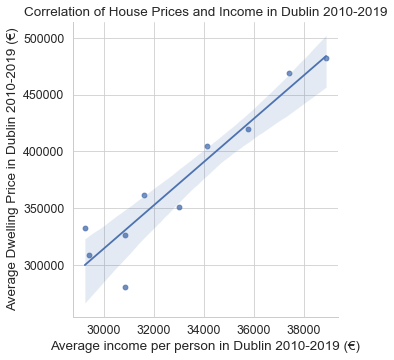

In [85]:
#Plotting a seaborn lm plot showing the correlation between dwelling price and average income per person in Dublin between 2010 and 2019
lmplot = sns.lmplot(data=house_price_v_income, x='VALUE', y='Price', ci=95)

#Setting the plot title and axis titles
lmplot.set(xlabel='Average income per person in Dublin 2010-2019 (€)', ylabel='Average Dwelling Price in Dublin 2010-2019 (€)', title="Correlation of House Prices and Income in Dublin 2010-2019")

#Printing the plot.
plt.show()

In [86]:
#Printing the Pearson correlation coefficient of the relationship
house_price_v_income["Price"].corr(house_price_v_income["VALUE"])

0.9410491650747744

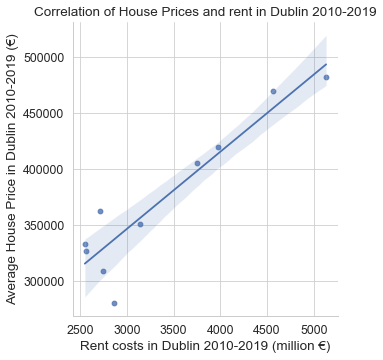

In [87]:
#Plotting a seaborn lm plot showing the correlation between dwelling price and rent cost in Dublin between 2010 and 2019
lmplot = sns.lmplot(data=house_price_v_rent_v_income, x='VALUE_rent', y='Price', ci=95)

#Setting the plot title and axis titles
lmplot.set(xlabel='Rent costs in Dublin 2010-2019 (million €)', ylabel='Average House Price in Dublin 2010-2019 (€)', title="Correlation of House Prices and rent in Dublin 2010-2019")

#Printing the plot.
plt.show()

In [88]:
#Printing the Pearson correlation coefficient of the relationship
house_price_v_rent_v_income["Price"].corr(house_price_v_rent_v_income["VALUE_rent"])

0.9287912610603551

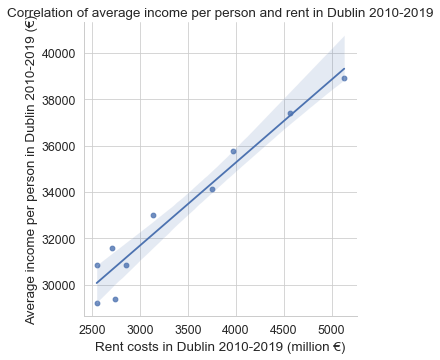

In [89]:
#Plotting a seaborn lm plot showing the correlation between rent cost and average income per person in Dublin between 2010 and 2019
lmplot = sns.lmplot(data=house_price_v_rent_v_income, x='VALUE_rent', y='VALUE_income pp', ci=95)

#Setting the plot title and axis titles
lmplot.set(xlabel='Rent costs in Dublin 2010-2019 (million €)', ylabel='Average income per person in Dublin 2010-2019 (€)', title="Correlation of average income per person and rent in Dublin 2010-2019")

#Printing the plot.
plt.show()

In [90]:
#Printing the Pearson correlation coefficient of the relationship
house_price_v_rent_v_income["VALUE_income pp"].corr(house_price_v_rent_v_income["VALUE_rent"])

0.9730365305895877

In [91]:
#Printing a correlation matrix of all values
house_price_v_rent_v_income.corr()

,Year,Price,VALUE_income pp,VALUE_rent
Year,1.000000,0.915668,0.978036,0.915643
Price,0.915668,1.000000,0.941049,0.928791
VALUE_income pp,0.978036,0.941049,1.000000,0.973037
VALUE_rent,0.915643,0.928791,0.973037,1.000000


<AxesSubplot:>

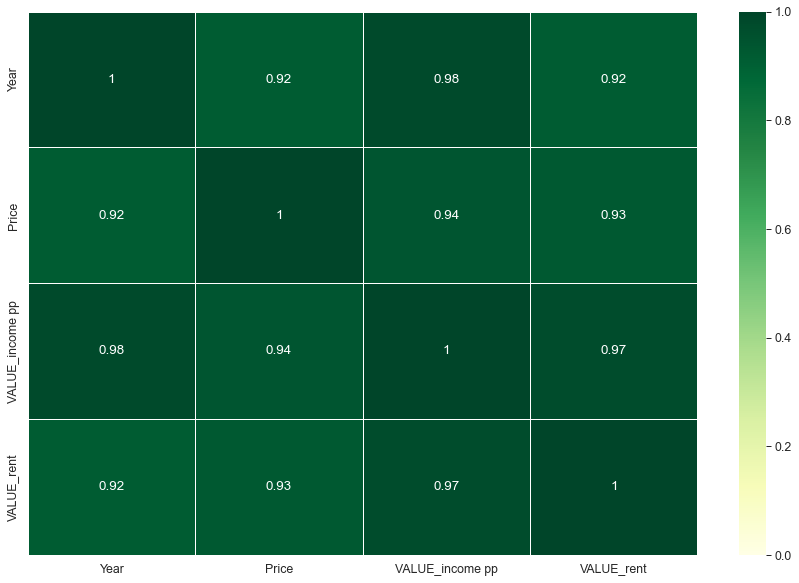

In [92]:
#Plotting a heat map of Year, Dwelling price, Average Income per Person and Rent Cost in Dublin from 2010 - 2019.
sns.heatmap(house_price_v_rent_v_income.corr(), cmap='YlGn', vmin=0, vmax=1, annot=True, linewidths=0.5)

### Insight
##### A very strong relationship is identified between all variables as evidenced by each of the lm plots, the heat map and the corresponding pearson correlation coefficients. Although correlation does not infer causation, due to the strength of these relationships and the range of our confidence interval set at 95% one can expect that if any of the variables (dwelling price, rent cost, income per person) were to  rise or fall in the near future that the others will follow a simialr trend. A limitation of this data is that all of the data points are already smoothed out and averaged over one calendar year. Where data was available for each month/week of each year, there would perhaps be more variance due to fluctuations within the year. That said, inflation is usually observed on a macroscale and therefore these models could be deemed as acceptable visualisations of this occuring between the years of 2010 and 2019.

## Bibliography

CSO. (2019). <i> Age of Purchasers.</i> Characteristics of Residential Property Purchasers 2010 - 2019. [[Online]](https://www.cso.ie/en/releasesandpublications/fp/fp-cropp/characteristicsofresidentialpropertypurchasers2010-2019/ageofpurchasers/)

CSO. (2021). <i>CIA02 - Estimates of Household Income</i>. [[Online]](https://data.gov.ie/dataset/cia02-estimates-of-household-income)

CSO. (2019). <i> Executive Summary</i>.  Characteristics of Residential Property Purchasers 2010 - 2019. [[Online]](https://www.cso.ie/en/releasesandpublications/fp/fp-cropp/characteristicsofresidentialpropertypurchasers2010-2019/executivesummary/)

McGuinness, S. (2020). <i>Dublin Postcode Boundaries - Shane McGuinness</i>. [[Online]](https://zenodo.org/record/4284592#.YlLs6OfMLrc)

Ordnance Survey Ireland. (2019). <i>Counties - OSi National Statutory Boundaries - Generalised 20m.</i> [[Online]](https://data-osi.opendata.arcgis.com/datasets/OSi::counties-osi-national-statutory-boundaries-generalised-20m/explore?location=53.386751%2C-8.258351%2C6.99&showTable=true)

Smart Dublin. (2021). <i>PSRA - Dublin Residential Property Price Register.</i>[[Online]](https://data.smartdublin.ie/dataset/dublin-residential-property-price-register)

Vinicius, M. (2021). <i>Python - Plotting a simple interactive map with Bokeh.</i> [[Online]](https://www.youtube.com/watch?v=Wgd0Wm6SQIo)

In [93]:
#import mysql.connector
#mydb = mysql.connector.connect(
 #   host="local host",
  #  user="root",
   # password="password1234"
    #database='sys')